In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
from sklearn.model_selection import KFold, train_test_split
import xgboost as xgb
import pickle as pkl
import importlib
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import ExtraTreesClassifier as ETC
from sklearn.ensemble import AdaBoostClassifier as ABC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.neural_network import MLPClassifier as MLPC
from xgboost.sklearn import XGBClassifier as XGBC
from sklearn import metrics
from functools import reduce
from sklearn.linear_model import LogisticRegression as LR
import scripts.xgboost_tuning as xgb_tuning
from sklearn.ensemble import BaggingClassifier as BC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KernelDensity as KD
from sklearn.metrics import log_loss, roc_auc_score
import matplotlib.pyplot as plt
import pickle as pkl
from pylab import rcParams
rcParams['figure.figsize'] = 5, 5

# <center>Задача непрямого управления объектом в нейрокомпьютерном интерфейсе </center>

In [2]:
def recurrence_plot(series, epsilon=1.0):
    rp = (np.abs(series - series[:, np.newaxis]) < epsilon).astype(int)
    plt.imshow(rp, origin='lower', interpolation='none', cmap='Greys')
    plt.show()

In [3]:
def poincare_plot(series):
    plt.scatter(series[:-1], series[1:])
    plt.show()

In [4]:
dataset = pd.read_csv('./eeg_eye_state.csv', sep=',')

In [5]:
dataset.head()

1        2        3        4        5        6        7        8  \
0  4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
1  4324.62  4004.62  4293.85  4148.72  4342.05  4586.67  4097.44  4638.97   
2  4327.69  4006.67  4295.38  4156.41  4336.92  4583.59  4096.92  4630.26   
3  4328.72  4011.79  4296.41  4155.90  4343.59  4582.56  4097.44  4630.77   
4  4326.15  4011.79  4292.31  4151.28  4347.69  4586.67  4095.90  4627.69   

         9       10       11       12       13       14  target  
0  4222.05  4238.46  4211.28  4280.51  4635.90  4393.85       0  
1  4210.77  4226.67  4207.69  4279.49  4632.82  4384.10       0  
2  4207.69  4222.05  4206.67  4282.05  4628.72  4389.23       0  
3  4217.44  4235.38  4210.77  4287.69  4632.31  4396.41       0  
4  4210.77  4244.10  4212.82  4288.21  4632.82  4398.46       0

In [6]:
dataset.shape

(14980, 15)

In [7]:
dataset_np = dataset.as_matrix()

In [8]:
zero_start = 0
one_start = 188
window_width = 128

Recurrence plot, target = 0

channel 0


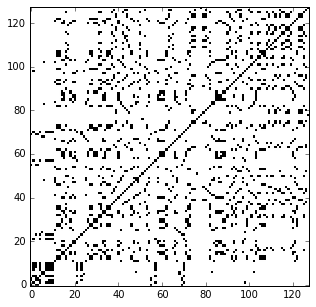

channel 1


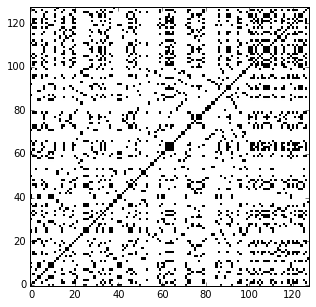

channel 2


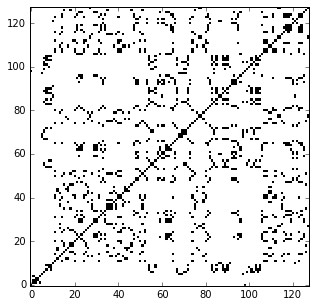

channel 3


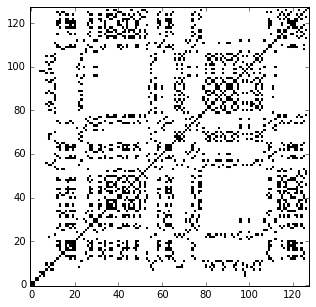

channel 4


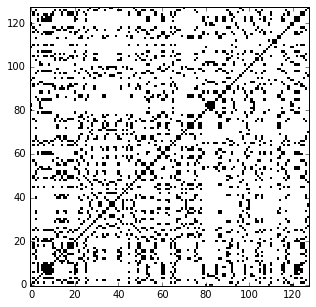

channel 5


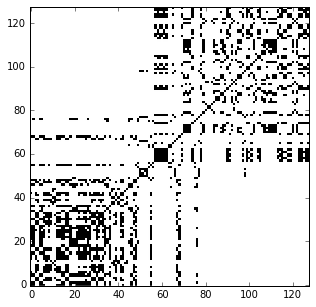

channel 6


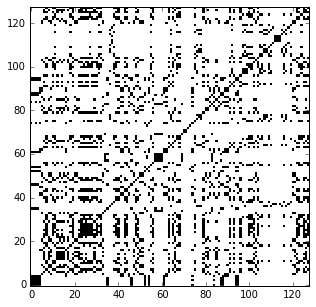

channel 7


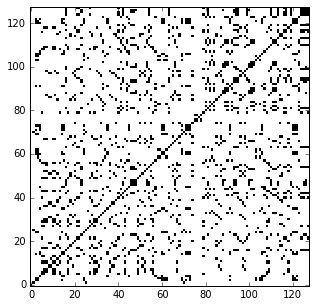

channel 8


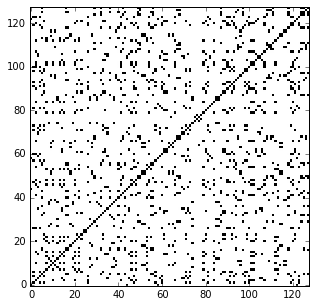

channel 9


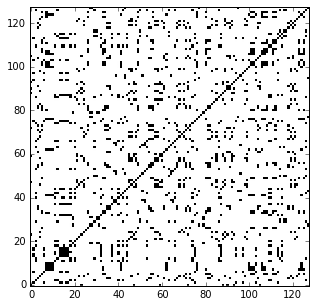

channel 10


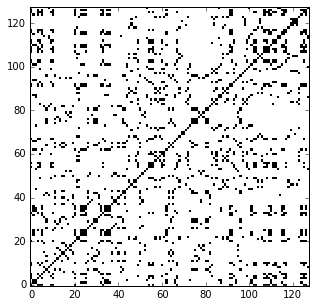

channel 11


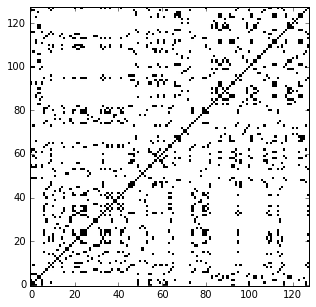

channel 12


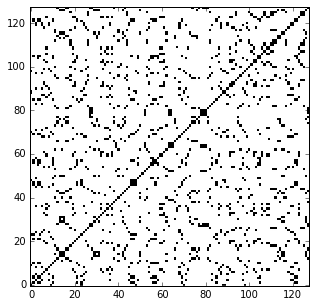

channel 13


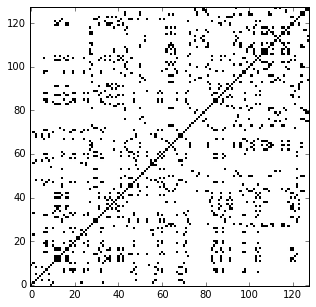

In [9]:
for i in range(14):
    print('channel', i)
    recurrence_plot(dataset_np[zero_start: zero_start + window_width, i], epsilon=2.0)

Poincare plot, target = 0

channel 0


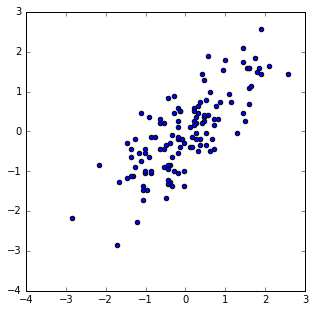

channel 1


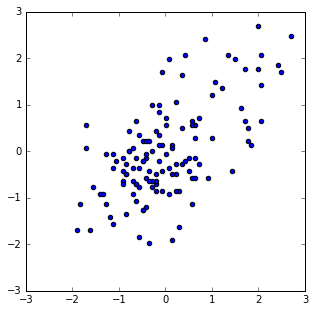

channel 2


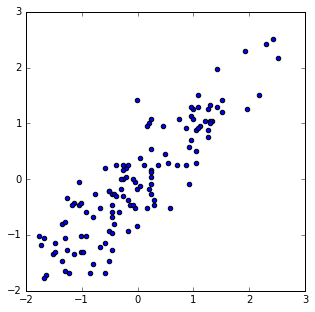

channel 3


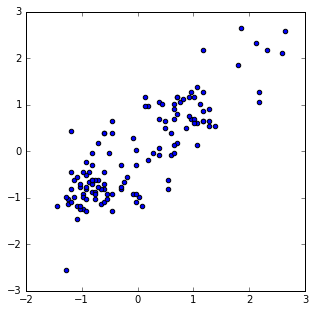

channel 4


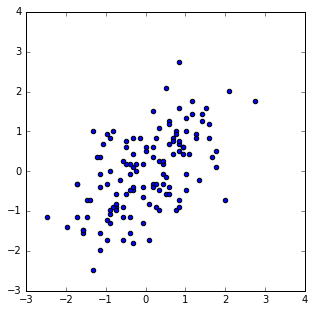

channel 5


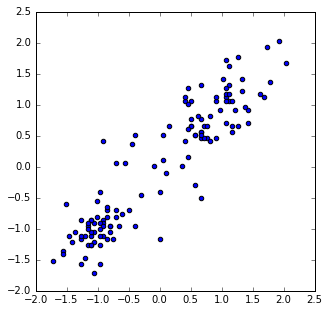

channel 6


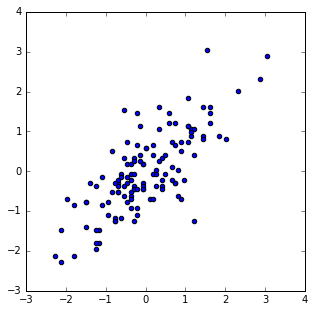

channel 7


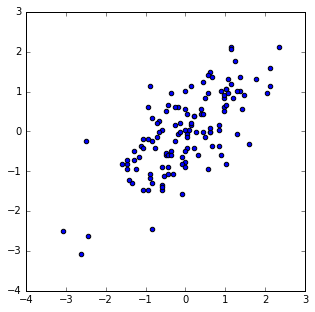

channel 8


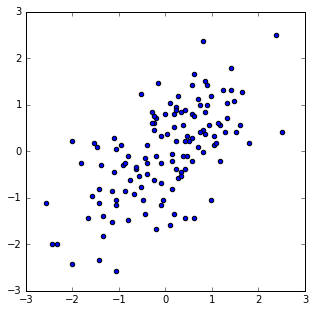

channel 9


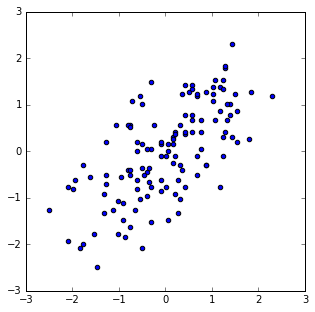

channel 10


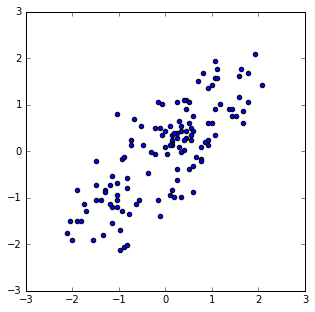

channel 11


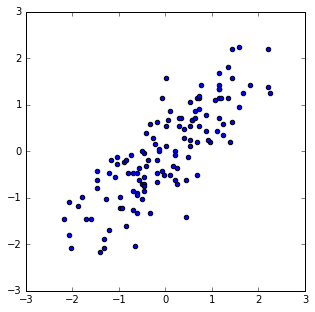

channel 12


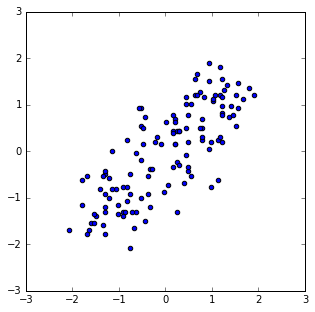

channel 13


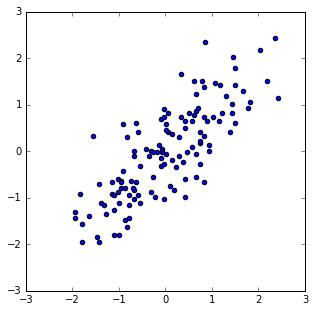

In [10]:
for i in range(14):
    print('channel', i)
    poincare_plot(StandardScaler().fit_transform(dataset_np[zero_start: zero_start + window_width, i].reshape(-1,
                                                                                                              1)))

Recurrence plot, target = 1

channel 0


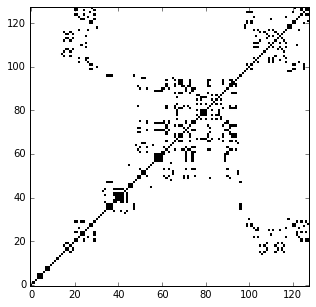

channel 1


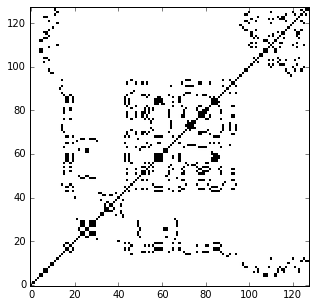

channel 2


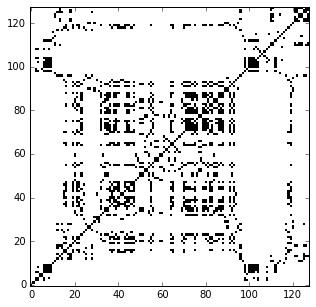

channel 3


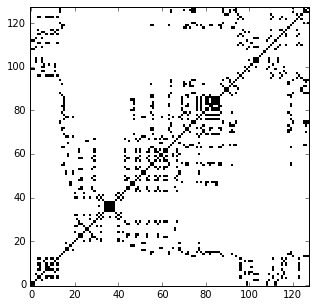

channel 4


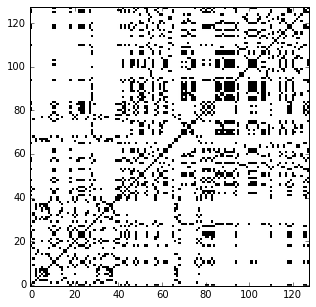

channel 5


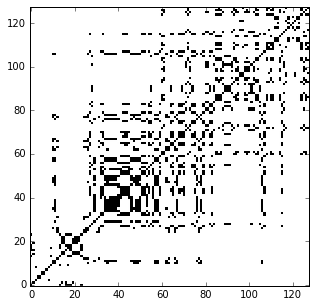

channel 6


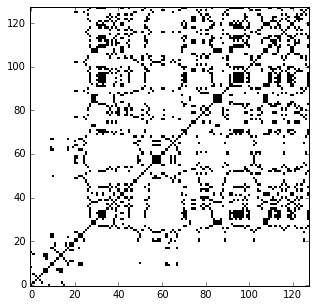

channel 7


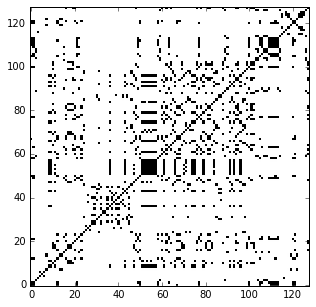

channel 8


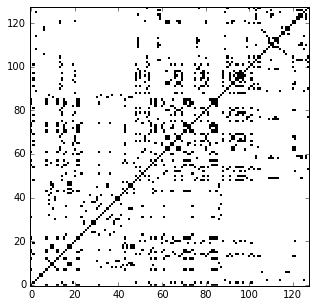

channel 9


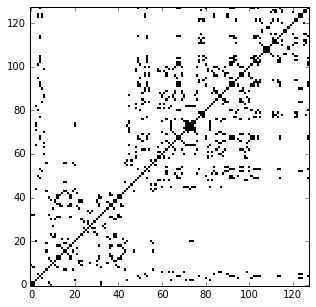

channel 10


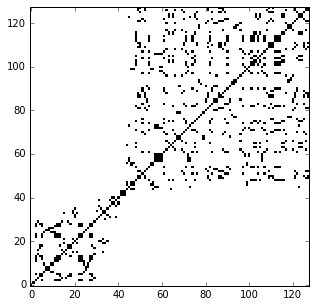

channel 11


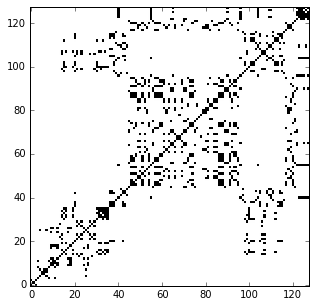

channel 12


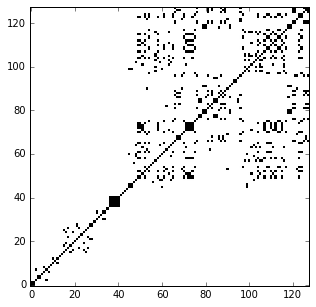

channel 13


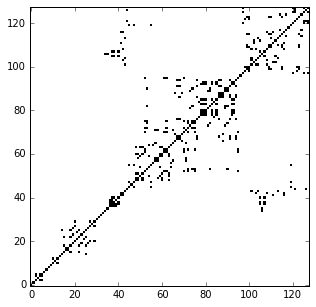

In [11]:
for i in range(14):
    print('channel', i)
    recurrence_plot(dataset_np[one_start: one_start + window_width, i], epsilon=2.0)

Poincare plot, target = 1

channel 0


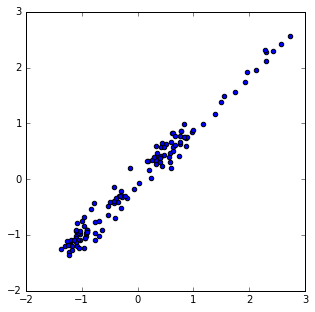

channel 1


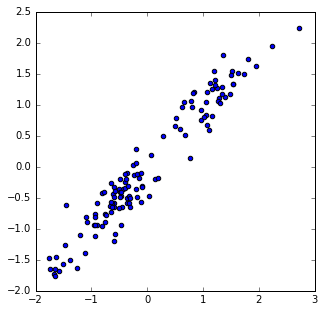

channel 2


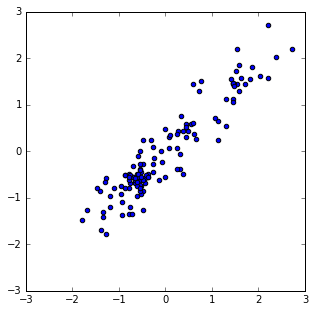

channel 3


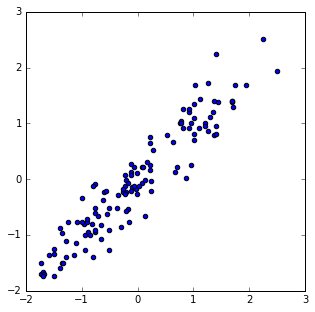

channel 4


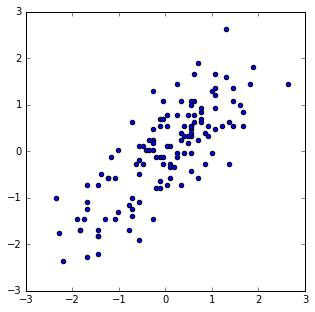

channel 5


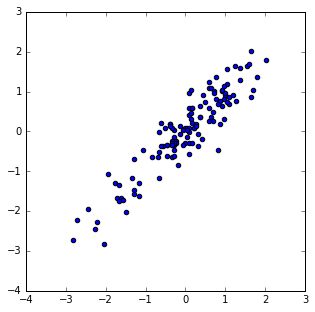

channel 6


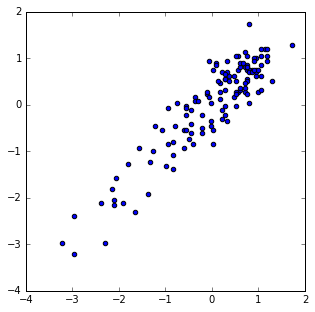

channel 7


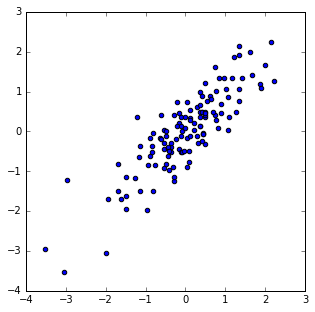

channel 8


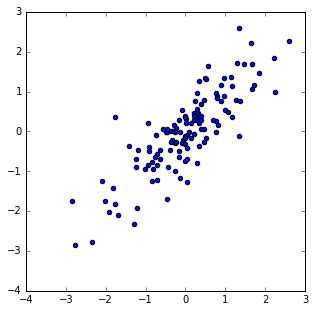

channel 9


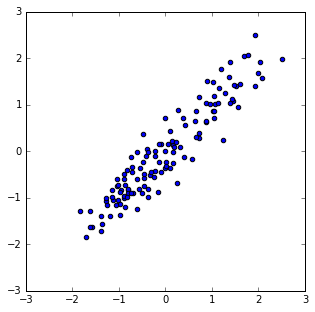

channel 10


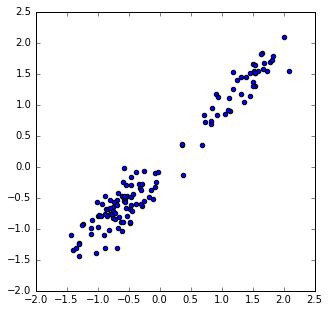

channel 11


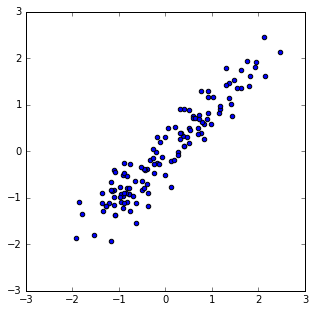

channel 12


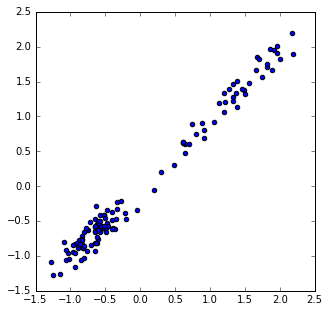

channel 13


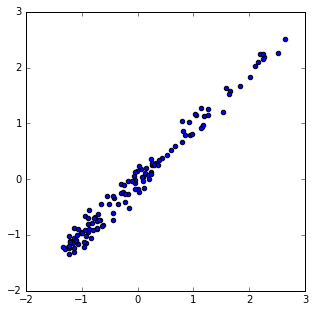

In [12]:
for i in range(14):
    print('channel', i)
    poincare_plot(StandardScaler().fit_transform(dataset_np[one_start: one_start + window_width, i].reshape(-1, 1)))

In [13]:
def recurrence(series, epsilon=1.0):
    return (np.abs(series - series[:, np.newaxis]) < epsilon).sum() / (series.shape[0] * series.shape[0])

Recurrence, target = 0

In [14]:
for i in range(14):
    print('channel', i)
    print('    recurrence', recurrence(dataset_np[zero_start: zero_start + window_width, i], epsilon=2.0))

channel 0
    recurrence 0.111938476562
channel 1
    recurrence 0.1552734375
channel 2
    recurrence 0.0908203125
channel 3
    recurrence 0.131591796875
channel 4
    recurrence 0.161865234375
channel 5
    recurrence 0.138671875
channel 6
    recurrence 0.167846679688
channel 7
    recurrence 0.11962890625
channel 8
    recurrence 0.0965576171875
channel 9
    recurrence 0.103149414062
channel 10
    recurrence 0.10986328125
channel 11
    recurrence 0.09423828125
channel 12
    recurrence 0.098388671875
channel 13
    recurrence 0.0843505859375


Recurrence, target = 1

In [15]:
for i in range(14):
    print('channel', i)
    print('    recurrence', recurrence(dataset_np[one_start: one_start + window_width, i], epsilon=2.0))

channel 0
    recurrence 0.0435791015625
channel 1
    recurrence 0.05615234375
channel 2
    recurrence 0.10693359375
channel 3
    recurrence 0.0655517578125
channel 4
    recurrence 0.15185546875
channel 5
    recurrence 0.107543945312
channel 6
    recurrence 0.126831054688
channel 7
    recurrence 0.0958251953125
channel 8
    recurrence 0.07958984375
channel 9
    recurrence 0.0625
channel 10
    recurrence 0.061279296875
channel 11
    recurrence 0.0714111328125
channel 12
    recurrence 0.04931640625
channel 13
    recurrence 0.03076171875


In [16]:
def autocorrelation(series):
    zero_mean = series - series.mean()
    zero_mean = np.hstack((zero_mean, zero_mean))
    return np.correlate(zero_mean, zero_mean, mode='full')[zero_mean.shape[0] - 1:
                                                           zero_mean.shape[0] - 1 + series.shape[0]] /\
           ((series.shape[0] - np.arange(series.shape[0])) * series.std()**2)

Autocorrelation, target = 0

channel 0


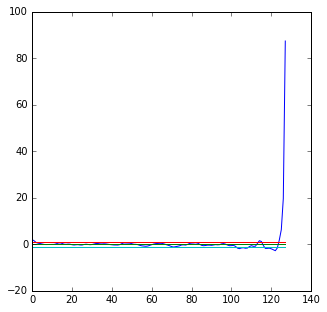

channel 1


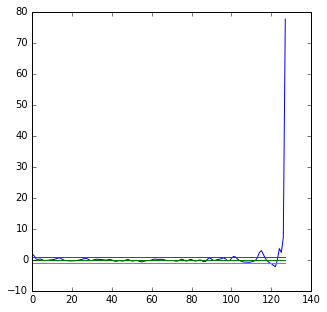

channel 2


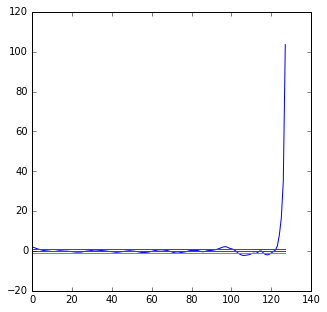

channel 3


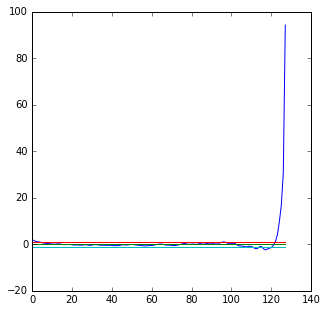

channel 4


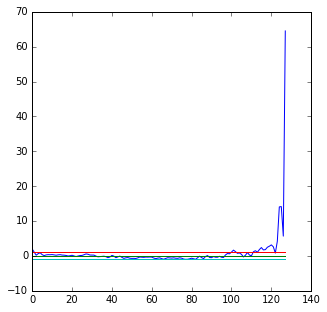

channel 5


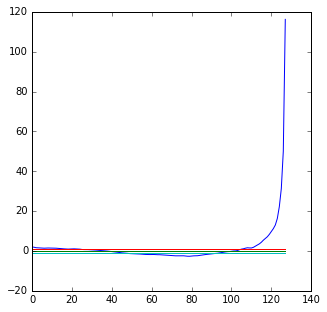

channel 6


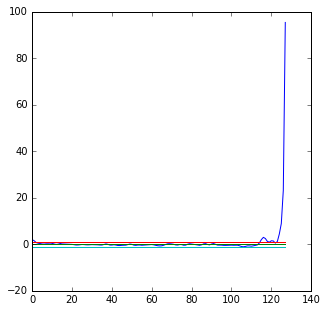

channel 7


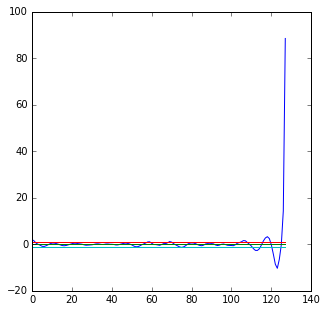

channel 8


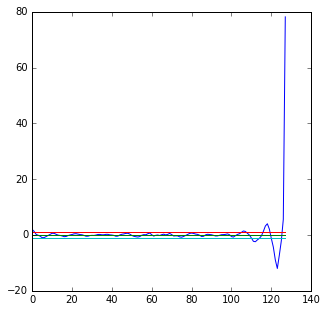

channel 9


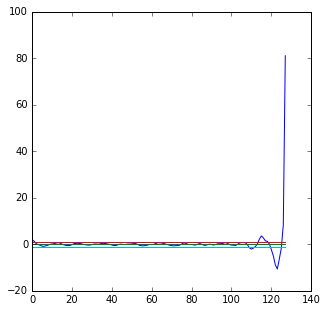

channel 10


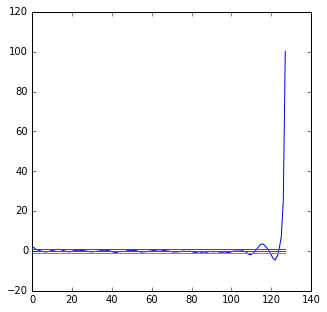

channel 11


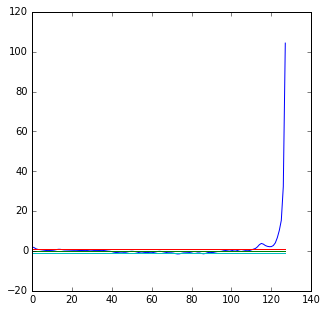

channel 12


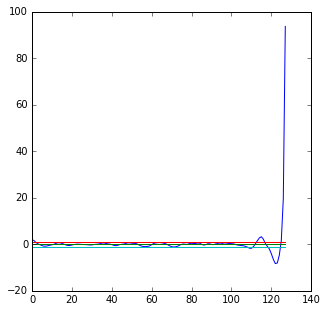

channel 13


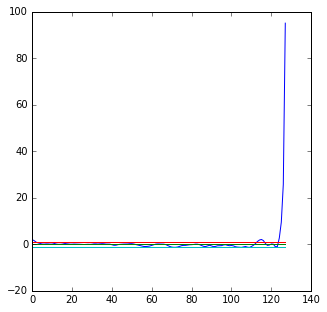

In [17]:
for i in range(14):
    print('channel', i)
    plt.plot(autocorrelation(dataset_np[zero_start: zero_start + window_width, i]))
    plt.plot(np.zeros(dataset_np[zero_start: zero_start + window_width, i].shape[0]))
    plt.plot(np.zeros(dataset_np[zero_start: zero_start + window_width, i].shape[0]) + 1)
    plt.plot(np.zeros(dataset_np[zero_start: zero_start + window_width, i].shape[0]) - 1)
    plt.show()

Autocorrelation, target = 1

channel 0


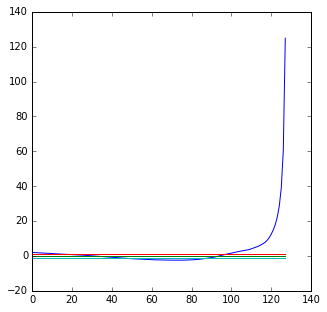

channel 1


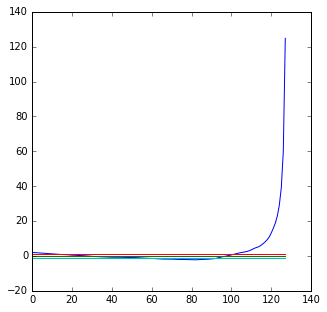

channel 2


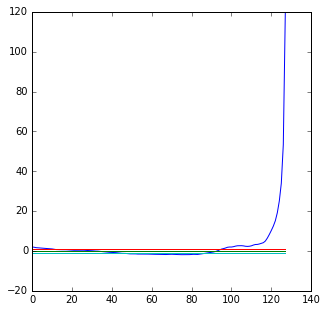

channel 3


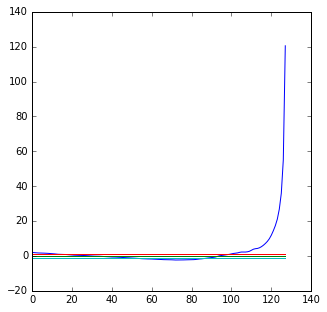

channel 4


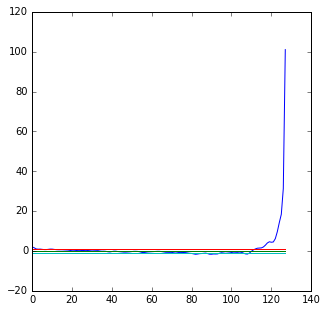

channel 5


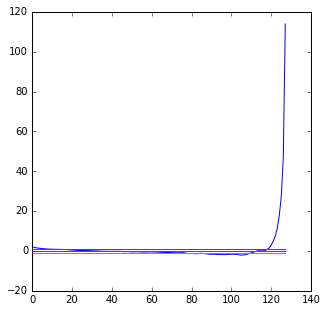

channel 6


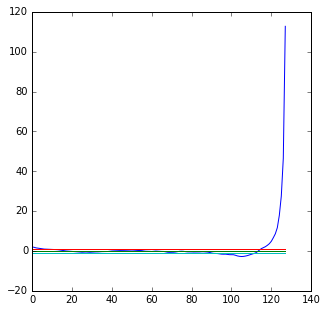

channel 7


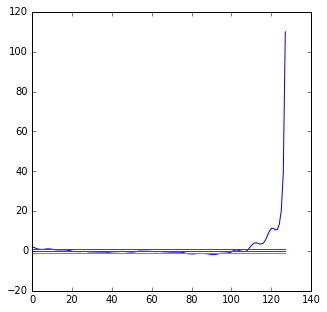

channel 8


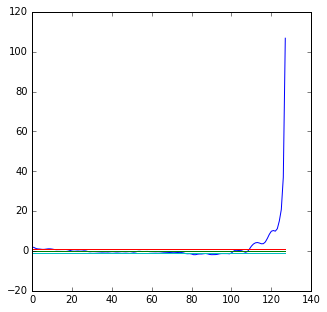

channel 9


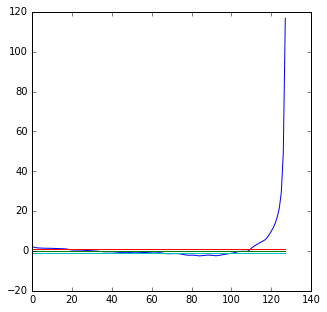

channel 10


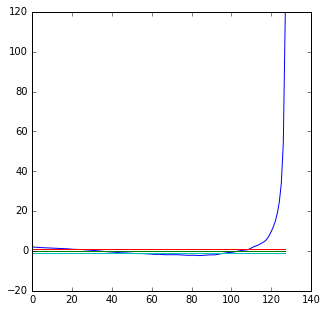

channel 11


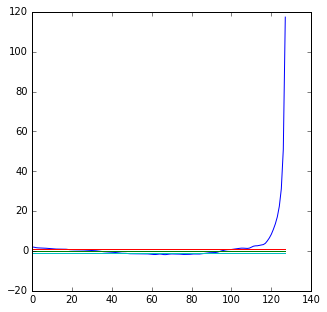

channel 12


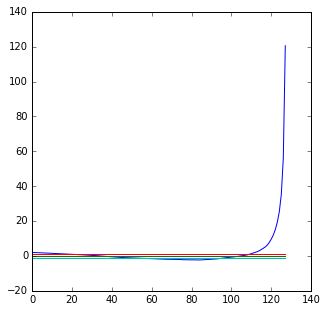

channel 13


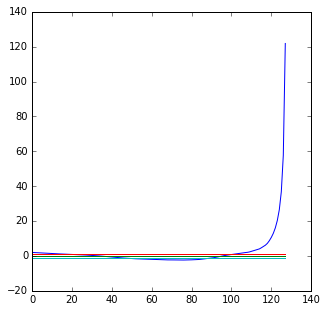

In [18]:
for i in range(14):
    print('channel', i)
    plt.plot(autocorrelation(dataset_np[one_start: one_start + window_width, i]))
    plt.plot(np.zeros(dataset_np[one_start: one_start + window_width, i].shape[0]))
    plt.plot(np.zeros(dataset_np[one_start: one_start + window_width, i].shape[0]) + 1)
    plt.plot(np.zeros(dataset_np[one_start: one_start + window_width, i].shape[0]) - 1)
    plt.show()

In [19]:
def normalized_crosscorrelation(series1, series2):
    if series1.shape[0] != series2.shape[0]:
        raise BaseException('shapes must be the same')
    if (series1.shape[0] == 1) or (series2.shape[0] == 1):
        if np.isclose(series1[0], 0.0, rtol=0.0, atol=0.000001) or np.isclose(series2[0], 0.0, rtol=0.0,
                                                                              atol=0.000001):
            return 0.0
        if np.isclose(series1[0], series2[0], rtol=0.0, atol=0.000001):
            return 1.0
        if np.isclose(abs(series1[0]), abs(series2[0]), rtol=0.0, atol=0.000001):
            return -1.0
        return 0.0
    return ((series1 - series1.mean()) * (series2 - series2.mean())).sum() /\
            (series1.shape[0] * series1.std() * series2.std())

In [20]:
def normalized_autocorrelation(series, max_lag):
    result = []
    result.append(normalized_crosscorrelation(series, series))
    if max_lag <= 0:
        return np.array(result)
    if max_lag >= series.shape[0]:
        raise BaseException('max_lag must be not more than series length')
    temp_series = np.hstack((series, series))
    for k in range(1, max_lag + 1):
        result.append(normalized_crosscorrelation(temp_series[:-k], temp_series[k:]))
    return np.array(result)

Normalized autocorrelation, target = 0

channel 0


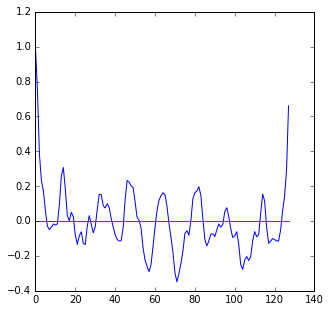

channel 1


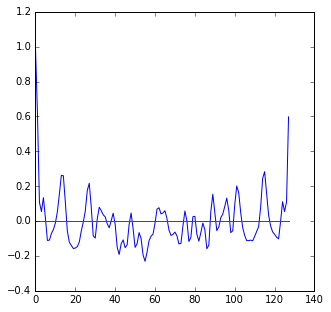

channel 2


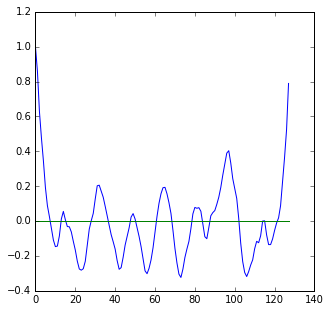

channel 3


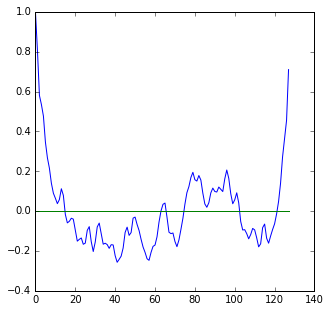

channel 4


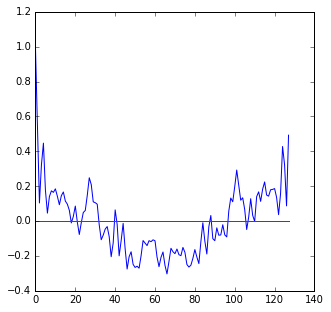

channel 5


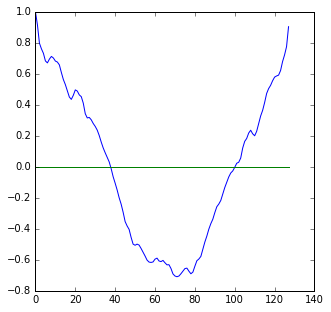

channel 6


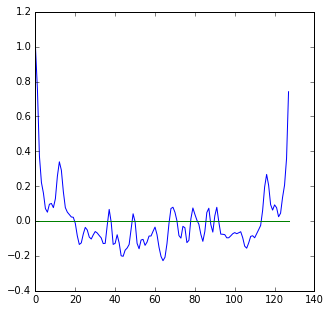

channel 7


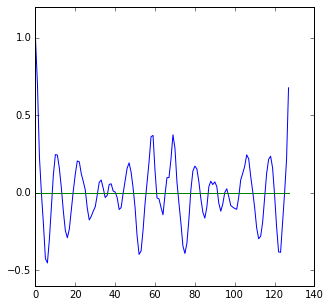

channel 8


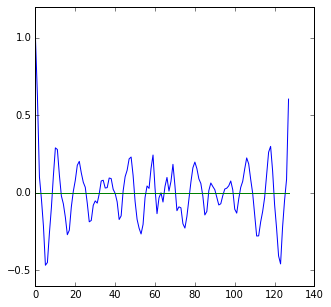

channel 9


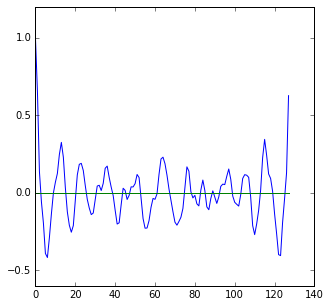

channel 10


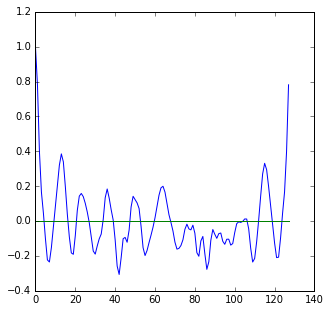

channel 11


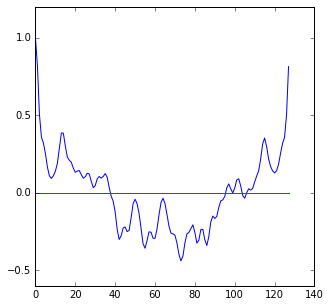

channel 12


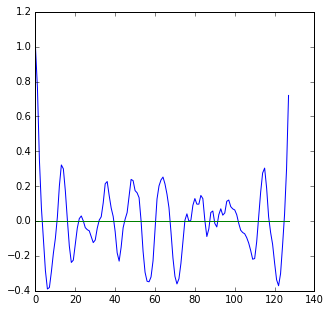

channel 13


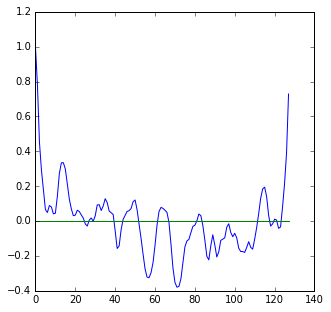

In [21]:
for i in range(14):
    print('channel', i)
    plt.plot(normalized_autocorrelation(dataset_np[zero_start: zero_start + window_width, i],
                                        dataset_np[zero_start: zero_start + window_width, i].shape[0] - 1))
    plt.plot(np.zeros(dataset_np[zero_start: zero_start + window_width, i].shape[0]))
    plt.show()

Normalized autocorrelation, target = 1

channel 0


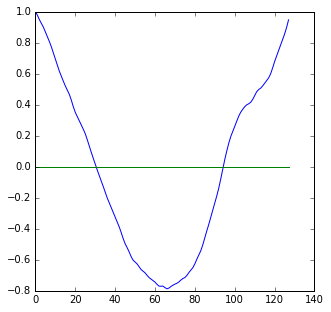

channel 1


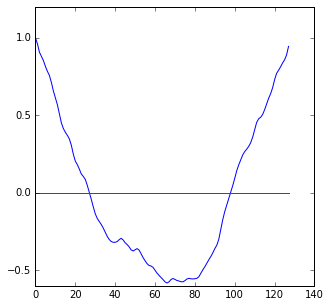

channel 2


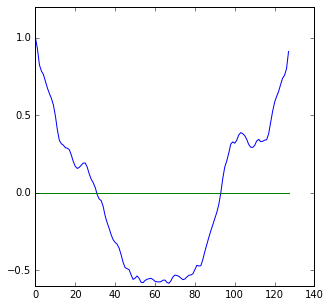

channel 3


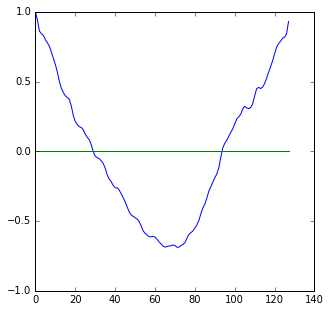

channel 4


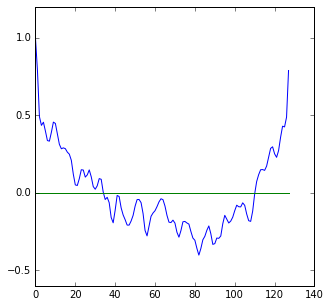

channel 5


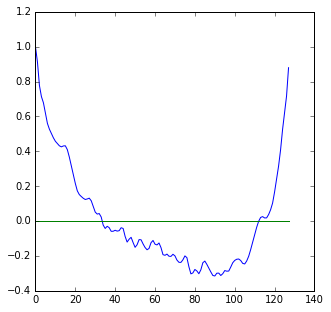

channel 6


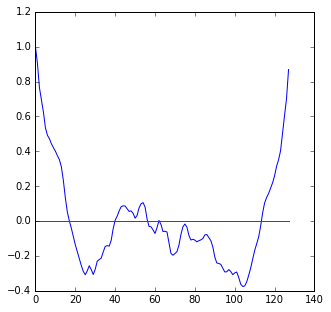

channel 7


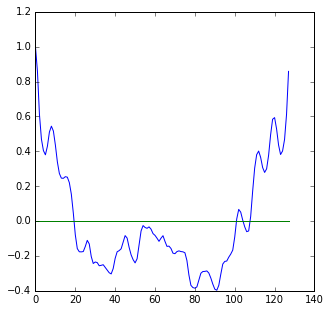

channel 8


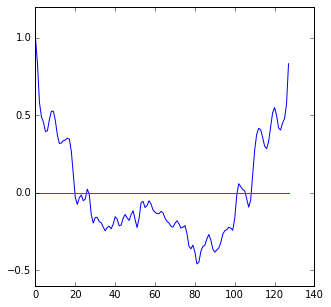

channel 9


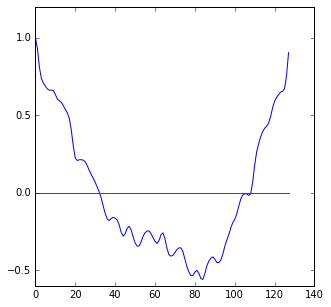

channel 10


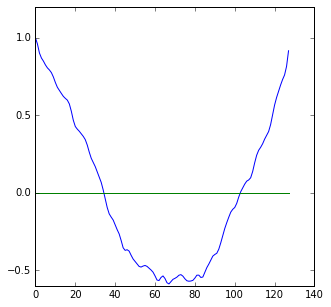

channel 11


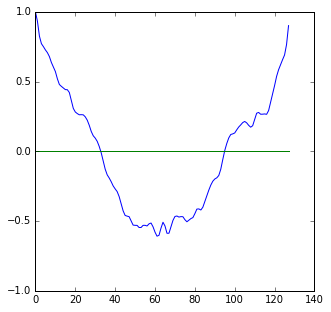

channel 12


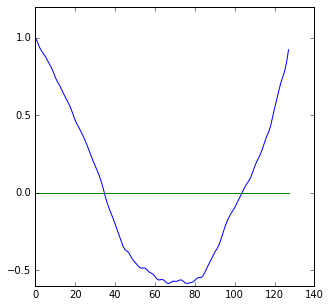

channel 13


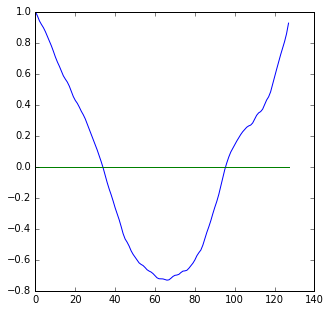

In [22]:
for i in range(14):
    print('channel', i)
    plt.plot(normalized_autocorrelation(dataset_np[one_start: one_start + window_width, i],
                                        dataset_np[one_start: one_start + window_width, i].shape[0] - 1))
    plt.plot(np.zeros(dataset_np[one_start: one_start + window_width, i].shape[0]))
    plt.show()

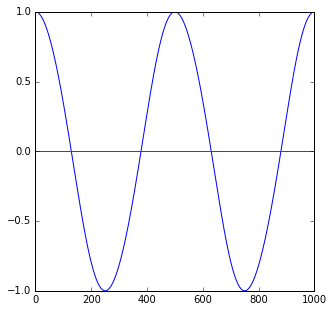

In [23]:
plt.plot(normalized_autocorrelation(np.sin(np.linspace(0, 4 * np.pi, 1000)), 999))
plt.plot(np.zeros(1000))
plt.plot(np.zeros(1000) + 1)
plt.plot(np.zeros(1000) - 1)

In [24]:
def mean_autocorrelation(series, max_lag):
    return normalized_autocorrelation(series, max_lag).mean()

Mean normalized autocorrelation amplitude, target = 0

In [25]:
for i in range(14):
    print('channel', i)
    print('    mean amplitude', mean_autocorrelation(dataset_np[zero_start: zero_start + window_width, i],
                                                dataset_np[zero_start: zero_start + window_width, i].shape[0] - 1))

channel 0
    mean amplitude 0.00201936486258
channel 1
    mean amplitude 0.00116581963432
channel 2
    mean amplitude 0.00192859509918
channel 3
    mean amplitude 0.00282446870386
channel 4
    mean amplitude 0.00302681331613
channel 5
    mean amplitude 0.00343088432851
channel 6
    mean amplitude 0.000901977501111
channel 7
    mean amplitude 0.000248228077926
channel 8
    mean amplitude 0.00015807955693
channel 9
    mean amplitude 0.000569285426393
channel 10
    mean amplitude 0.00181134794885
channel 11
    mean amplitude 0.00530426316293
channel 12
    mean amplitude 0.000414991834751
channel 13
    mean amplitude 0.00375061885583


Mean normalized autocorrelation amplitude, target = 1

In [26]:
for i in range(14):
    print('channel', i)
    print('    mean amplitude', mean_autocorrelation(dataset_np[one_start: one_start + window_width, i],
                                dataset_np[one_start: one_start + window_width, i].shape[0] - 1))

channel 0
    mean amplitude -0.00412038783487
channel 1
    mean amplitude 0.0022374890816
channel 2
    mean amplitude -0.00119077859089
channel 3
    mean amplitude 0.00576391028263
channel 4
    mean amplitude 0.00753629614389
channel 5
    mean amplitude 0.0167562002065
channel 6
    mean amplitude 0.00421903122347
channel 7
    mean amplitude 0.000353066416963
channel 8
    mean amplitude 0.0058411244984
channel 9
    mean amplitude 0.0103408758447
channel 10
    mean amplitude 0.00372623308606
channel 11
    mean amplitude -0.00170390552232
channel 12
    mean amplitude 0.00437363541638
channel 13
    mean amplitude -0.00244213471793


In [27]:
def mean_period(series, max_lag, threshold=-1.0):
    '''left local minimum and all local maximums must be uniquely defined'''
    if series.shape[0] < 3:
        raise BaseException('time series must be longer')
    auto_corr = normalized_autocorrelation(series, max_lag)
    auto_corr[auto_corr < threshold] = threshold
    diffs = np.diff(auto_corr)
    prod_diffs = diffs[:-1] * diffs[1:]
    susp_extr_dots = np.where(prod_diffs < 0)[0]
    start_index = np.array([0])
    if (diffs[susp_extr_dots[0]] < 0) and (diffs[susp_extr_dots[0] + 1] > 0):
        if susp_extr_dots.shape[0] > 1:
            start_index = np.hstack((0, susp_extr_dots[1::2], series.shape[0]))
    else:
        start_index = np.hstack((0, susp_extr_dots[::2], series.shape[0]))
    if start_index.shape[0] == 1:
        start_index = np.hstack((start_index, series.shape[0]))
    return np.diff(start_index).mean()

Mean normalized autocorrelation period, target = 0

In [28]:
for i in range(14):
    print('channel', i)
    print('    mean period', mean_period(dataset_np[zero_start: zero_start + window_width, i],
                                dataset_np[zero_start: zero_start + window_width, i].shape[0] - 1))

channel 0
    mean period 6.4
channel 1
    mean period 6.09523809524
channel 2
    mean period 12.8
channel 3
    mean period 6.09523809524
channel 4
    mean period 4.0
channel 5
    mean period 12.8
channel 6
    mean period 6.4
channel 7
    mean period 9.14285714286
channel 8
    mean period 7.11111111111
channel 9
    mean period 7.11111111111
channel 10
    mean period 8.0
channel 11
    mean period 7.52941176471
channel 12
    mean period 9.84615384615
channel 13
    mean period 8.0


Mean normalized autocorrelation period, target = 1

In [29]:
for i in range(14):
    print('channel', i)
    print('    mean period', mean_period(dataset_np[one_start: one_start + window_width, i],
                                dataset_np[one_start: one_start + window_width, i].shape[0] - 1))

channel 0
    mean period 64.0
channel 1
    mean period 25.6
channel 2
    mean period 12.8
channel 3
    mean period 25.6
channel 4
    mean period 6.09523809524
channel 5
    mean period 6.4
channel 6
    mean period 9.84615384615
channel 7
    mean period 8.0
channel 8
    mean period 6.09523809524
channel 9
    mean period 11.6363636364
channel 10
    mean period 21.3333333333
channel 11
    mean period 11.6363636364
channel 12
    mean period 21.3333333333
channel 13
    mean period 128.0


In [30]:
def poincare_SD(series):
    scaled = StandardScaler().fit_transform(series.reshape(-1, 1)).ravel()
    pp = np.hstack((scaled[:-1][:, np.newaxis], scaled[1:][:, np.newaxis]))
    p1 = np.array([[-1.0 / np.sqrt(2.0)], [1.0 / np.sqrt(2.0)]])
    p2 = np.array([[1.0 / np.sqrt(2.0)], [1.0 / np.sqrt(2.0)]])
    return np.dot(pp, p1).ravel().std(), np.dot(pp, p2).ravel().std()

Poincare plot standard deviations over directions, target = 0

In [31]:
for i in range(14):
    print('channel', i)
    print('    SD along (y = -x, y = x):', poincare_SD(dataset_np[zero_start: zero_start + window_width, i]))

channel 0
    SD along (y = -x, y = x): (0.4647622212571656, 1.3152369319432391)
channel 1
    SD along (y = -x, y = x): (0.60765832090060001, 1.2705516548084768)
channel 2
    SD along (y = -x, y = x): (0.33993266627299346, 1.359544491680563)
channel 3
    SD along (y = -x, y = x): (0.3927046071515472, 1.335711780472485)
channel 4
    SD along (y = -x, y = x): (0.65425216060095392, 1.2407927532505831)
channel 5
    SD along (y = -x, y = x): (0.28514397678368836, 1.3877484667311866)
channel 6
    SD along (y = -x, y = x): (0.49373330653881364, 1.3272281036511342)
channel 7
    SD along (y = -x, y = x): (0.53280822122540328, 1.299282836321086)
channel 8
    SD along (y = -x, y = x): (0.61065370713511335, 1.2733412351241282)
channel 9
    SD along (y = -x, y = x): (0.58059847180778312, 1.2865953109353649)
channel 10
    SD along (y = -x, y = x): (0.46472893263433268, 1.3406837086640861)
channel 11
    SD along (y = -x, y = x): (0.42809229185663811, 1.3528459179947918)
channel 12
    SD a

Poincare plot standard deviations over direction, target = 1

In [32]:
for i in range(14):
    print('channel', i)
    print('    SD along (y = -x, y = x):', poincare_SD(dataset_np[one_start: one_start + window_width, i]))

channel 0
    SD along (y = -x, y = x): (0.10603075999661875, 1.3944259578004716)
channel 1
    SD along (y = -x, y = x): (0.17991781631102879, 1.3848130861766195)
channel 2
    SD along (y = -x, y = x): (0.25354881694484782, 1.3801041777585483)
channel 3
    SD along (y = -x, y = x): (0.23440446852987343, 1.391376952727486)
channel 4
    SD along (y = -x, y = x): (0.45997765895914816, 1.3429889922555676)
channel 5
    SD along (y = -x, y = x): (0.27587298276335875, 1.3841799231666352)
channel 6
    SD along (y = -x, y = x): (0.28979325347174234, 1.3798469537748075)
channel 7
    SD along (y = -x, y = x): (0.37687630134765232, 1.3684509704561214)
channel 8
    SD along (y = -x, y = x): (0.40343043840763787, 1.3600890045008245)
channel 9
    SD along (y = -x, y = x): (0.24952894267708536, 1.3910431923650606)
channel 10
    SD along (y = -x, y = x): (0.15610404334811179, 1.3980886104305776)
channel 11
    SD along (y = -x, y = x): (0.23820357223309305, 1.3867338999568188)
channel 12
    

In [33]:
def DET_and_mean_diag_length(series, epsilon=1.0, min_l=1):
    if (min_l > series.shape[0]) or (min_l < 1):
        raise BaseException('min_l must be in correct range')
    rp = (np.abs(series - series[:, np.newaxis]) < epsilon).astype(np.int)
    lines_hist = np.zeros(series.shape[0]).astype(np.int)
    isline = False
    length = 0
    for j in range(1, series.shape[0]):
        for k in range(series.shape[0] - j):
            if rp[k][j + k]:
                if isline:
                    length += 1
                else:
                    isline = True
                    length = 1
            else:
                isline = False
                if length:
                    lines_hist[length - 1] += 1
                    length = 0
        isline = False
        if length:
            lines_hist[length - 1] += 1
            length = 0
    lines_hist *= 2
    lines_hist[-1] += 1
    line_lengths = np.arange(series.shape[0]) + 1
    mask = line_lengths >= min_l
    line_lengths[~mask] = 0
    sum_length = (line_lengths * lines_hist).sum()
    return sum_length / rp.sum(), sum_length / lines_hist[mask].sum()

Determinism and mean diagonal line length on recurrence plot, target = 0

In [34]:
for i in range(14):
    print('channel', i)
    print('    (Determinism, mean diagonal line length):', DET_and_mean_diag_length(
                                  dataset_np[zero_start: zero_start + window_width, i], epsilon=2.0, min_l=3))

channel 0
    (Determinism, mean diagonal line length): (0.13631406761177753, 6.0975609756097562)
channel 1
    (Determinism, mean diagonal line length): (0.14229559748427673, 4.8266666666666671)
channel 2
    (Determinism, mean diagonal line length): (0.15322580645161291, 6.9090909090909092)
channel 3
    (Determinism, mean diagonal line length): (0.17532467532467533, 5.1780821917808222)
channel 4
    (Determinism, mean diagonal line length): (0.12594268476621417, 5.3015873015873014)
channel 5
    (Determinism, mean diagonal line length): (0.29401408450704225, 4.5442176870748296)
channel 6
    (Determinism, mean diagonal line length): (0.20000000000000001, 4.4000000000000004)
channel 7
    (Determinism, mean diagonal line length): (0.12653061224489795, 6.3589743589743586)
channel 8
    (Determinism, mean diagonal line length): (0.10745891276864729, 11.333333333333334)
channel 9
    (Determinism, mean diagonal line length): (0.13254437869822486, 7.7241379310344831)
channel 10
    (Dete

Determinism and mean diagonal line length on recurrence plot, target = 1

In [35]:
for i in range(14):
    print('channel', i)
    print('    (Determinism, mean diagonal line length):', DET_and_mean_diag_length(
                                  dataset_np[one_start: one_start + window_width, i], epsilon=2.0, min_l=3))

channel 0
    (Determinism, mean diagonal line length): (0.24369747899159663, 11.6)
channel 1
    (Determinism, mean diagonal line length): (0.20652173913043478, 9.0476190476190474)
channel 2
    (Determinism, mean diagonal line length): (0.23858447488584475, 4.5934065934065931)
channel 3
    (Determinism, mean diagonal line length): (0.18994413407821228, 8.1600000000000001)
channel 4
    (Determinism, mean diagonal line length): (0.18810289389067525, 4.4571428571428573)
channel 5
    (Determinism, mean diagonal line length): (0.21566401816118047, 5.2054794520547949)
channel 6
    (Determinism, mean diagonal line length): (0.23195380173243504, 4.6796116504854366)
channel 7
    (Determinism, mean diagonal line length): (0.15031847133757961, 7.612903225806452)
channel 8
    (Determinism, mean diagonal line length): (0.15337423312883436, 8.695652173913043)
channel 9
    (Determinism, mean diagonal line length): (0.1796875, 10.823529411764707)
channel 10
    (Determinism, mean diagonal lin

In [36]:
import pyeeg
import pyrem.univariate as pruni

Approximate entropy, target = 0

In [37]:
for i in range(14):
    print('channel', i)
    print('    Approximate entropy', pyeeg.ap_entropy(dataset_np[zero_start: zero_start + window_width, i], 10, 2))

channel 0
    Approximate entropy -0.0489399151977
channel 1
    Approximate entropy -0.0489399151977
channel 2
    Approximate entropy -0.0489399151977
channel 3
    Approximate entropy -0.0489399151977
channel 4
    Approximate entropy -0.0489399151977
channel 5
    Approximate entropy -0.0489399151977
channel 6
    Approximate entropy -0.0489399151977
channel 7
    Approximate entropy -0.0489399151977
channel 8
    Approximate entropy -0.0489399151977
channel 9
    Approximate entropy -0.0489399151977
channel 10
    Approximate entropy -0.0489399151977
channel 11
    Approximate entropy -0.0489399151977
channel 12
    Approximate entropy -0.0489399151977
channel 13
    Approximate entropy -0.0489399151977


Approximate entropy, target = 1

In [38]:
for i in range(14):
    print('channel', i)
    print('    Approximate entropy', pyeeg.ap_entropy(dataset_np[one_start: one_start + window_width, i], 10, 2))

channel 0
    Approximate entropy -0.0489399151977
channel 1
    Approximate entropy -0.0489399151977
channel 2
    Approximate entropy -0.0489399151977
channel 3
    Approximate entropy -0.0489399151977
channel 4
    Approximate entropy -0.0489399151977
channel 5
    Approximate entropy -0.0396296415649
channel 6
    Approximate entropy -0.0489399151977
channel 7
    Approximate entropy -0.0489399151977
channel 8
    Approximate entropy -0.0489399151977
channel 9
    Approximate entropy -0.0489399151977
channel 10
    Approximate entropy -0.0489399151977
channel 11
    Approximate entropy -0.0489399151977
channel 12
    Approximate entropy -0.0489399151977
channel 13
    Approximate entropy -0.0489399151977


Sample entropy, target = 0

In [39]:
for i in range(14):
    print('channel', i)
    print('    Sample entropy', pyeeg.samp_entropy(dataset_np[zero_start: zero_start + window_width, i], 10,
                                                        0.2))

channel 0
    Sample entropy 0.00843886864586
channel 1
    Sample entropy 0.00843886864586
channel 2
    Sample entropy 0.00843886864586
channel 3
    Sample entropy 0.00843886864586
channel 4
    Sample entropy 0.00843886864586
channel 5
    Sample entropy 0.00843886864586
channel 6
    Sample entropy 0.00843886864586
channel 7
    Sample entropy 0.00843886864586
channel 8
    Sample entropy 0.00843886864586
channel 9
    Sample entropy 0.00843886864586
channel 10
    Sample entropy 0.00843886864586
channel 11
    Sample entropy 0.00843886864586
channel 12
    Sample entropy 0.00843886864586
channel 13
    Sample entropy 0.00843886864586


Sample entropy, target = 1

In [40]:
for i in range(14):
    print('channel', i)
    print('    Sample entropy', pyeeg.samp_entropy(dataset_np[one_start: one_start + window_width, i], 10,
                                                        0.2))

channel 0
    Sample entropy 0.00843886864586
channel 1
    Sample entropy 0.00843886864586
channel 2
    Sample entropy 0.00843886864586
channel 3
    Sample entropy 0.00843886864586
channel 4
    Sample entropy 0.00843886864586
channel 5
    Sample entropy 0.00843886864586
channel 6
    Sample entropy 0.00843886864586
channel 7
    Sample entropy 0.00843886864586
channel 8
    Sample entropy 0.00843886864586
channel 9
    Sample entropy 0.00843886864586
channel 10
    Sample entropy 0.00843886864586
channel 11
    Sample entropy 0.00843886864586
channel 12
    Sample entropy 0.00843886864586
channel 13
    Sample entropy 0.00843886864586


Spectral entropy, target = 0

In [41]:
for i in range(14):
    print('channel', i)
    print('    Spectral entropy', pruni.spectral_entropy(dataset_np[zero_start: zero_start + window_width, i], 0.5))

channel 0
    Spectral entropy 6.66006321868e-05
channel 1
    Spectral entropy 4.14807736814e-05
channel 2
    Spectral entropy 9.59875692667e-05
channel 3
    Spectral entropy 6.80528468969e-05
channel 4
    Spectral entropy 2.63674053278e-05
channel 5
    Spectral entropy 5.39373255425e-05
channel 6
    Spectral entropy 3.19183874023e-05
channel 7
    Spectral entropy 4.58324437516e-05
channel 8
    Spectral entropy 7.93013875772e-05
channel 9
    Spectral entropy 6.85717969997e-05
channel 10
    Spectral entropy 6.81651270719e-05
channel 11
    Spectral entropy 7.52798546083e-05
channel 12
    Spectral entropy 6.32003381229e-05
channel 13
    Spectral entropy 0.000100699974901


Spectral entropy, target = 1

In [42]:
for i in range(14):
    print('channel', i)
    print('    Spectral entropy', pruni.spectral_entropy(dataset_np[one_start: one_start + window_width, i], 0.5))

channel 0
    Spectral entropy 0.000819898320555
channel 1
    Spectral entropy 0.000382528031565
channel 2
    Spectral entropy 0.000129484614773
channel 3
    Spectral entropy 0.000197874323599
channel 4
    Spectral entropy 3.1595625719e-05
channel 5
    Spectral entropy 6.81338203237e-05
channel 6
    Spectral entropy 7.69728172161e-05
channel 7
    Spectral entropy 8.49537871745e-05
channel 8
    Spectral entropy 0.000140365190713
channel 9
    Spectral entropy 0.000175227142071
channel 10
    Spectral entropy 0.000413023998071
channel 11
    Spectral entropy 0.000143154237965
channel 12
    Spectral entropy 0.00106996354764
channel 13
    Spectral entropy 0.00110401320734


Petrosian fractal dimension, target = 0

In [43]:
for i in range(14):
    print('channel', i)
    print('    Petrosian fractal dimension', pruni.pfd(dataset_np[zero_start: zero_start + window_width, i]))

channel 0
    Petrosian fractal dimension 1.02727662241
channel 1
    Petrosian fractal dimension 1.03025246756
channel 2
    Petrosian fractal dimension 1.02607969045
channel 3
    Petrosian fractal dimension 1.03437994586
channel 4
    Petrosian fractal dimension 1.0337930237
channel 5
    Petrosian fractal dimension 1.03320520268
channel 6
    Petrosian fractal dimension 1.03143630455
channel 7
    Petrosian fractal dimension 1.02607969045
channel 8
    Petrosian fractal dimension 1.0337930237
channel 9
    Petrosian fractal dimension 1.03320520268
channel 10
    Petrosian fractal dimension 1.02906493319
channel 11
    Petrosian fractal dimension 1.02667863191
channel 12
    Petrosian fractal dimension 1.02547979347
channel 13
    Petrosian fractal dimension 1.03261647861


Petrosian fractal dimension, target = 1

In [44]:
for i in range(14):
    print('channel', i)
    print('    Petrosian fractal dimension', pruni.pfd(dataset_np[one_start: one_start + window_width, i]))

channel 0
    Petrosian fractal dimension 1.02906493319
channel 1
    Petrosian fractal dimension 1.02667863191
channel 2
    Petrosian fractal dimension 1.03202684731
channel 3
    Petrosian fractal dimension 1.03320520268
channel 4
    Petrosian fractal dimension 1.02965916472
channel 5
    Petrosian fractal dimension 1.02607969045
channel 6
    Petrosian fractal dimension 1.02846976858
channel 7
    Petrosian fractal dimension 1.02547979347
channel 8
    Petrosian fractal dimension 1.03320520268
channel 9
    Petrosian fractal dimension 1.02787366647
channel 10
    Petrosian fractal dimension 1.02787366647
channel 11
    Petrosian fractal dimension 1.03025246756
channel 12
    Petrosian fractal dimension 1.02787366647
channel 13
    Petrosian fractal dimension 1.02846976858


Hjorth signal parameters, target = 0

In [45]:
for i in range(14):
    print('channel', i)
    print('    (Activity, Complexity, Morbidity):', pruni.hjorth(dataset_np[zero_start: zero_start + window_width, 
                                                                            i]))

channel 0
    (Activity, Complexity, Morbidity): (18577171.643697657, 0.0015360535000214508, 761.76900882186897)
channel 1
    (Activity, Complexity, Morbidity): (16053205.706299219, 0.0015508698318716322, 802.96516066628089)
channel 2
    (Activity, Complexity, Morbidity): (18196322.052317187, 0.0013806242355584464, 791.25642401611901)
channel 3
    (Activity, Complexity, Morbidity): (17061628.622428909, 0.0013171853578162532, 973.48336147530972)
channel 4
    (Activity, Complexity, Morbidity): (18834736.406029686, 0.0013200142077797136, 1043.7196670800201)
channel 5
    (Activity, Complexity, Morbidity): (21117110.091856249, 0.00088896415123325759, 1430.3829600597821)
channel 6
    (Activity, Complexity, Morbidity): (16729058.829628907, 0.0011033847356020571, 1091.997603921571)
channel 7
    (Activity, Complexity, Morbidity): (21346179.904975001, 0.0014512828294296883, 817.05639900263191)
channel 8
    (Activity, Complexity, Morbidity): (17679613.18334531, 0.0022157660146075514, 572.

Hjorth signal parameters, target = 1

In [46]:
for i in range(14):
    print('channel', i)
    print('    (Activity, Complexity, Morbidity):', pruni.hjorth(dataset_np[one_start: one_start + window_width, 
                                                                            i]))

channel 0
    (Activity, Complexity, Morbidity): (18753348.63069297, 0.0014705104272215413, 771.58457316139629)
channel 1
    (Activity, Complexity, Morbidity): (15600439.42839453, 0.0016173770421060243, 742.79696094338146)
channel 2
    (Activity, Complexity, Morbidity): (18125984.565385938, 0.0012572598279646751, 971.52362611444619)
channel 3
    (Activity, Complexity, Morbidity): (16727282.213310938, 0.0014731471549948518, 875.02167636393085)
channel 4
    (Activity, Complexity, Morbidity): (18718362.392099217, 0.0010356893284136789, 1213.8962020515917)
channel 5
    (Activity, Complexity, Morbidity): (21217700.029403903, 0.00094529500399005814, 1252.67166804927)
channel 6
    (Activity, Complexity, Morbidity): (16769595.747355469, 0.0010602618125588343, 1137.242330671133)
channel 7
    (Activity, Complexity, Morbidity): (21467643.128887497, 0.0014539866360791345, 764.9037035956095)
channel 8
    (Activity, Complexity, Morbidity): (17837214.03678672, 0.0020365464913966089, 590.71623

In [47]:
#0.5, 1, 2, 3, 4, 5, 7, 9, 15, 30 Alexandre Barachant
#0.0 - 0.5, 0.5 - 4.0, 4.0 - 8.0, 8.0 - 13.0, 13.0 - 30.0, 30.0 - 45.0 my
import scipy.signal as sig

In [48]:
low_nd = sig.butter(5, 2 * 0.5 / window_width, btype='lowpass')
delta_nd = sig.butter(6, 2 * np.array([0.5, 4.0]) / window_width, btype='bandpass')
theta_nd = sig.butter(8, 2 * np.array([4.0, 8.0]) / window_width, btype='bandpass')
alpha_m_nd = sig.butter(11, 2 * np.array([8.0, 13.0]) / window_width, btype='bandpass')
beta_nd = sig.butter(11, 2 * np.array([13.0, 30.0]) / window_width, btype='bandpass')
gamma_nd = sig.butter(10, 2 * np.array([30.0, 42.0]) / window_width, btype='bandpass')

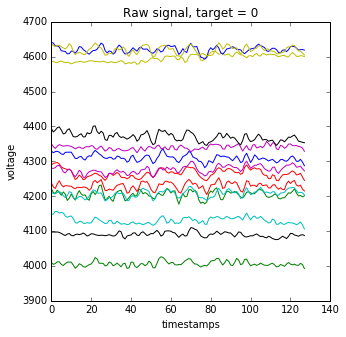

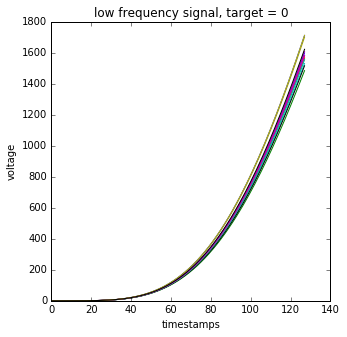

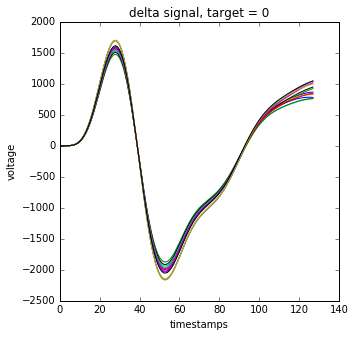

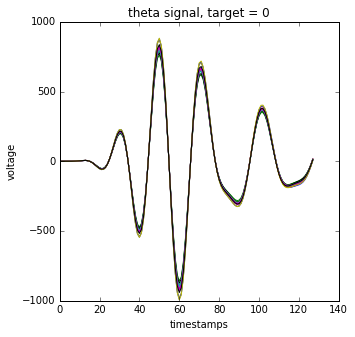

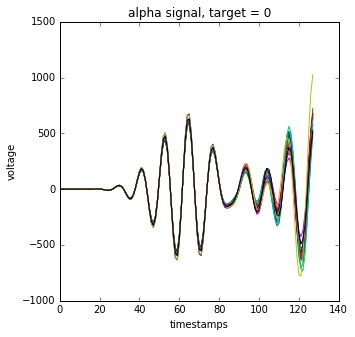

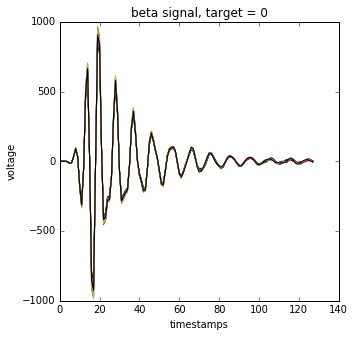

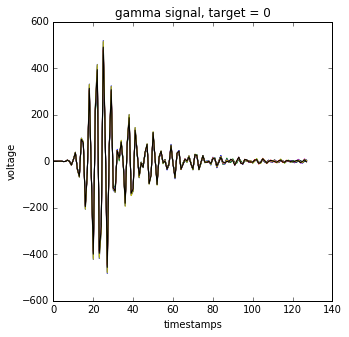

In [49]:
for i in range(14):
    plt.plot(dataset_np[zero_start: zero_start + window_width, i])
    plt.title('Raw signal, target = 0')
    plt.xlabel('timestamps')
    plt.ylabel('voltage')
plt.show()
for i in range(14):
    plt.plot(sig.lfilter(low_nd[0], low_nd[1], dataset_np[zero_start: zero_start + window_width, i]))
    plt.title('low frequency signal, target = 0')
    plt.xlabel('timestamps')
    plt.ylabel('voltage')
plt.show()
for i in range(14):
    plt.plot(sig.lfilter(delta_nd[0], delta_nd[1], dataset_np[zero_start: zero_start + window_width, i]))
    plt.title('delta signal, target = 0')
    plt.xlabel('timestamps')
    plt.ylabel('voltage')
plt.show()
for i in range(14):
    plt.plot(sig.lfilter(theta_nd[0], theta_nd[1], dataset_np[zero_start: zero_start + window_width, i]))
    plt.title('theta signal, target = 0')
    plt.xlabel('timestamps')
    plt.ylabel('voltage')
plt.show()
for i in range(14):
    plt.plot(sig.lfilter(alpha_m_nd[0], alpha_m_nd[1], dataset_np[zero_start: zero_start + window_width, i]))
    plt.title('alpha signal, target = 0')
    plt.xlabel('timestamps')
    plt.ylabel('voltage')
plt.show()
for i in range(14):
    plt.plot(sig.lfilter(beta_nd[0], beta_nd[1], dataset_np[zero_start: zero_start + window_width, i]))
    plt.title('beta signal, target = 0')
    plt.xlabel('timestamps')
    plt.ylabel('voltage')
plt.show()
for i in range(14):
    plt.plot(sig.lfilter(gamma_nd[0], gamma_nd[1], dataset_np[zero_start: zero_start + window_width, i]))
    plt.title('gamma signal, target = 0')
    plt.xlabel('timestamps')
    plt.ylabel('voltage')
plt.show()

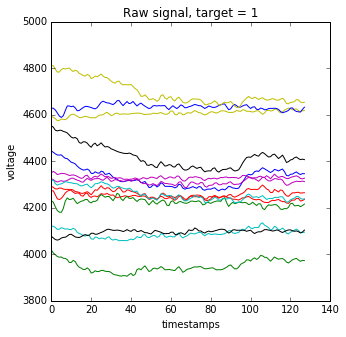

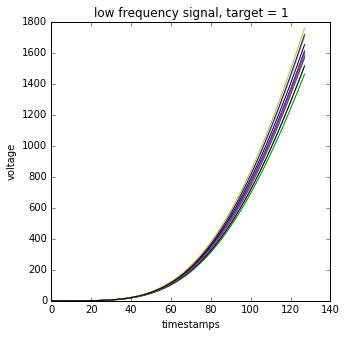

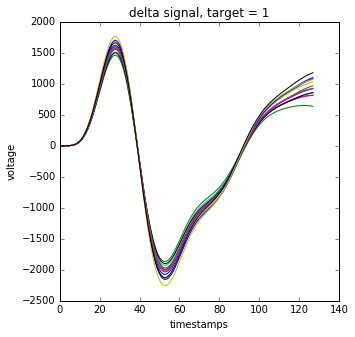

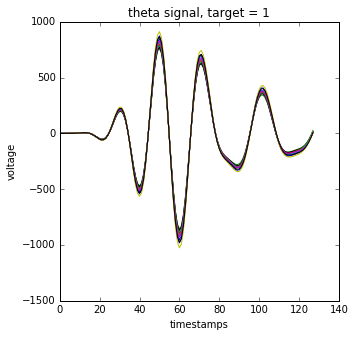

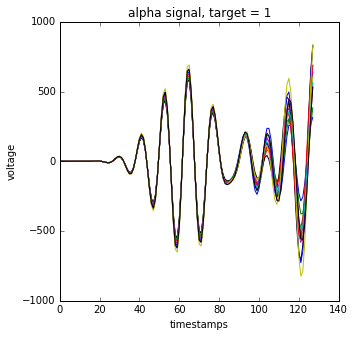

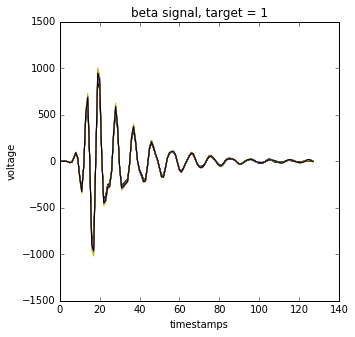

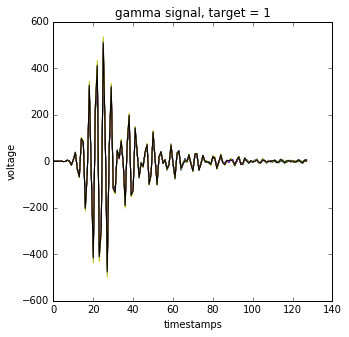

In [50]:
for i in range(14):
    plt.plot(dataset_np[one_start: one_start + window_width, i])
    plt.title('Raw signal, target = 1')
    plt.xlabel('timestamps')
    plt.ylabel('voltage')
plt.show()
for i in range(14):
    plt.plot(sig.lfilter(low_nd[0], low_nd[1], dataset_np[one_start: one_start + window_width, i]))
    plt.title('low frequency signal, target = 1')
    plt.xlabel('timestamps')
    plt.ylabel('voltage')
plt.show()
for i in range(14):
    plt.plot(sig.lfilter(delta_nd[0], delta_nd[1], dataset_np[one_start: one_start + window_width, i]))
    plt.title('delta signal, target = 1')
    plt.xlabel('timestamps')
    plt.ylabel('voltage')
plt.show()
for i in range(14):
    plt.plot(sig.lfilter(theta_nd[0], theta_nd[1], dataset_np[one_start: one_start + window_width, i]))
    plt.title('theta signal, target = 1')
    plt.xlabel('timestamps')
    plt.ylabel('voltage')
plt.show()
for i in range(14):
    plt.plot(sig.lfilter(alpha_m_nd[0], alpha_m_nd[1], dataset_np[one_start: one_start + window_width, i]))
    plt.title('alpha signal, target = 1')
    plt.xlabel('timestamps')
    plt.ylabel('voltage')
plt.show()
for i in range(14):
    plt.plot(sig.lfilter(beta_nd[0], beta_nd[1], dataset_np[one_start: one_start + window_width, i]))
    plt.title('beta signal, target = 1')
    plt.xlabel('timestamps')
    plt.ylabel('voltage')
plt.show()
for i in range(14):
    plt.plot(sig.lfilter(gamma_nd[0], gamma_nd[1], dataset_np[one_start: one_start + window_width, i]))
    plt.title('gamma signal, target = 1')
    plt.xlabel('timestamps')
    plt.ylabel('voltage')
plt.show()

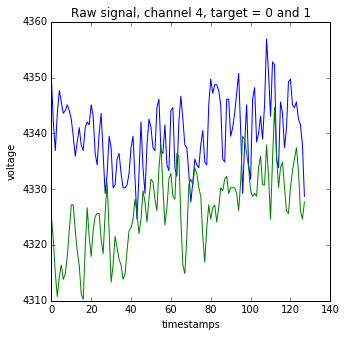

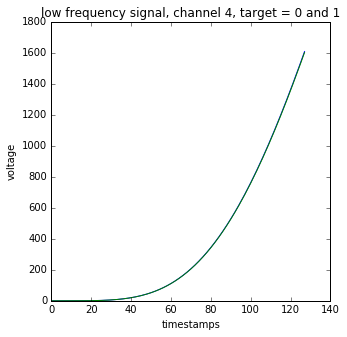

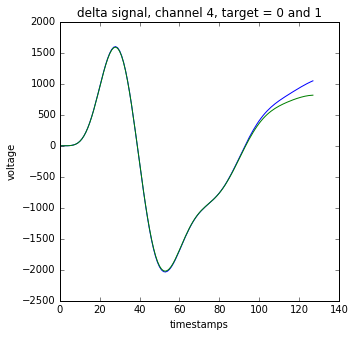

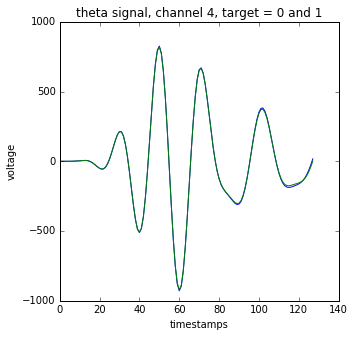

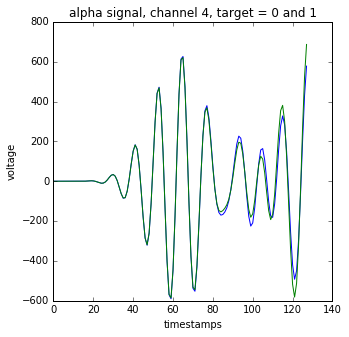

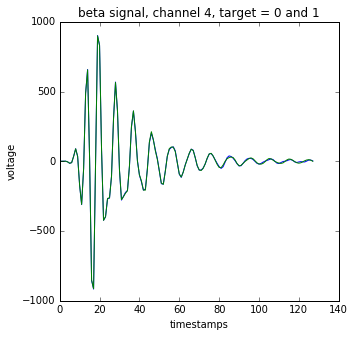

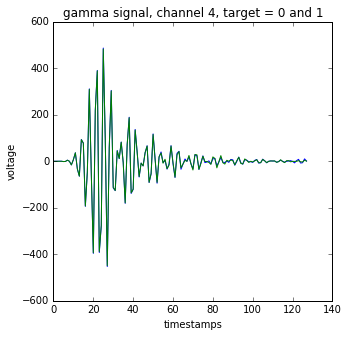

In [51]:
channel = 4
plt.plot(dataset_np[zero_start: zero_start + window_width, channel])
plt.plot(dataset_np[one_start: one_start + window_width, channel])
plt.title('Raw signal, channel %i, target = 0 and 1'%(channel))
plt.xlabel('timestamps')
plt.ylabel('voltage')
plt.show()
plt.plot(sig.lfilter(low_nd[0], low_nd[1], dataset_np[zero_start: zero_start + window_width, channel]))
plt.plot(sig.lfilter(low_nd[0], low_nd[1], dataset_np[one_start: one_start + window_width, channel]))
plt.title('low frequency signal, channel %i, target = 0 and 1'%(channel))
plt.xlabel('timestamps')
plt.ylabel('voltage')
plt.show()
plt.plot(sig.lfilter(delta_nd[0], delta_nd[1], dataset_np[zero_start: zero_start + window_width, channel]))
plt.plot(sig.lfilter(delta_nd[0], delta_nd[1], dataset_np[one_start: one_start + window_width, channel]))
plt.title('delta signal, channel %i, target = 0 and 1'%(channel))
plt.xlabel('timestamps')
plt.ylabel('voltage')
plt.show()
plt.plot(sig.lfilter(theta_nd[0], theta_nd[1], dataset_np[zero_start: zero_start + window_width, channel]))
plt.plot(sig.lfilter(theta_nd[0], theta_nd[1], dataset_np[one_start: one_start + window_width, channel]))
plt.title('theta signal, channel %i, target = 0 and 1'%(channel))
plt.xlabel('timestamps')
plt.ylabel('voltage')
plt.show()
plt.plot(sig.lfilter(alpha_m_nd[0], alpha_m_nd[1], dataset_np[zero_start: zero_start + window_width, channel]))
plt.plot(sig.lfilter(alpha_m_nd[0], alpha_m_nd[1], dataset_np[one_start: one_start + window_width, channel]))
plt.title('alpha signal, channel %i, target = 0 and 1'%(channel))
plt.xlabel('timestamps')
plt.ylabel('voltage')
plt.show()
plt.plot(sig.lfilter(beta_nd[0], beta_nd[1], dataset_np[zero_start: zero_start + window_width, channel]))
plt.plot(sig.lfilter(beta_nd[0], beta_nd[1], dataset_np[one_start: one_start + window_width, channel]))
plt.title('beta signal, channel %i, target = 0 and 1'%(channel))
plt.xlabel('timestamps')
plt.ylabel('voltage')
plt.show()
plt.plot(sig.lfilter(gamma_nd[0], gamma_nd[1], dataset_np[zero_start: zero_start + window_width, channel]))
plt.plot(sig.lfilter(gamma_nd[0], gamma_nd[1], dataset_np[one_start: one_start + window_width, channel]))
plt.title('gamma signal, channel %i, target = 0 and 1'%(channel))
plt.xlabel('timestamps')
plt.ylabel('voltage')
plt.show()

In [52]:
def FilterBank(X, filters='BandpassBank', sample_rate=128, butter_pows=None):
    freq_pairs = None
    X_processed = None
    if filters == 'BandpassBank':
        freq_pairs = [[0.5], [0.5, 4.0], [4.0, 8.0], [8.0, 13.0], [13.0, 30.0], [30.0, 42.0]]
        butter_pows = [5, 6, 8, 11, 11, 10]
    else:
        freq_pairs = filters
    for i in range(len(freq_pairs)):
        power = 5 if butter_pows is None else butter_pows[i]
        if len(freq_pairs[i]) == 1:
            b, a = sig.butter(power, 2 * freq_pairs[i][0] / sample_rate, btype='lowpass')
        else:
            b, a = sig.butter(power, 2 * np.array(freq_pairs[i]) / sample_rate, btype='bandpass')
        X_filtered = sig.lfilter(b, a, X, axis=0)
        X_processed = X_filtered if X_processed is None else np.c_[X_processed, X_filtered]
    return X_processed

In [53]:
bands_waves_zero = FilterBank(StandardScaler().fit_transform(dataset_np[zero_start: zero_start + 77, 0][:, np.newaxis]))
bands_waves_one = FilterBank(StandardScaler().fit_transform(dataset_np[one_start: one_start + 77, 0][:, np.newaxis]))

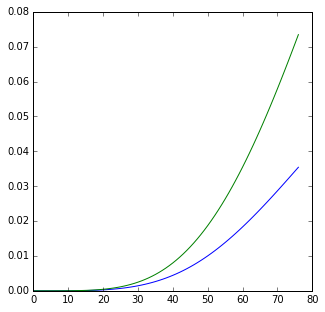

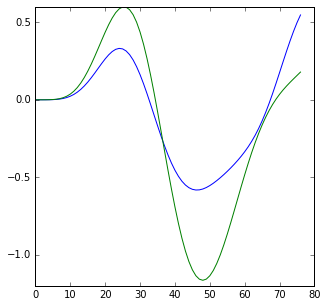

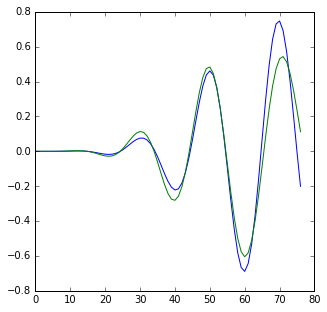

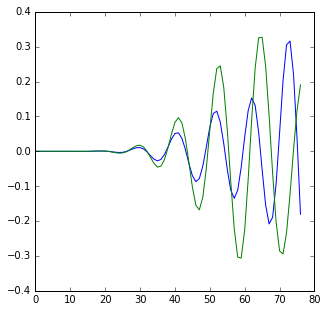

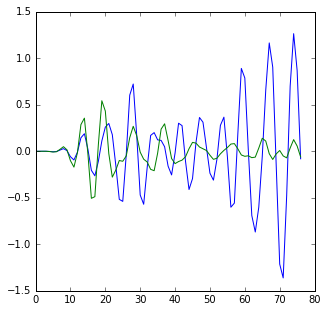

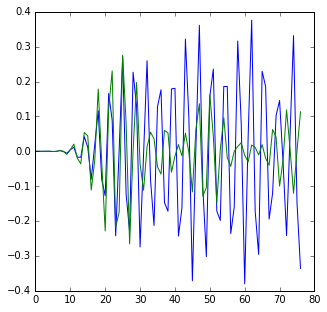

In [54]:
for i in range(bands_waves_one.shape[1]):
    plt.plot(bands_waves_zero[:, i].ravel())
    plt.plot(bands_waves_one[:, i].ravel())
    plt.show()

In [55]:
def WindowDataset(dataset, interval=77, shift=1):
    if (interval < 1) or (interval > dataset.shape[0]):
        raise BaseException('interval has invalid value')
    if (shift < 1) or (shift > interval):
        raise BaseException('shift has invalid value')
    windowed_dataset = np.zeros((np.ceil((dataset.shape[0] - interval + 1) / shift).astype(np.int),
                                 interval, dataset.shape[1]))
    begin = 0
    for i in range(windowed_dataset.shape[0]):
        windowed_dataset[i] = dataset[begin: begin + interval, :].copy()
        begin += shift
    return windowed_dataset

In [56]:
windowed_dataset = WindowDataset(dataset_np, interval=77, shift=1)

In [57]:
windowed_dataset.shape

(14904, 77, 15)

In [58]:
#recurrence(series, epsilon)
#mean_autocorrelation(series, max_lag)
#mean_period(series, max_lag, threshold)
#poincare_SD(series)
#DET_and_mean_diag_length(series, epsilon, min_l)
#pyeeg.ap_entropy(X, M, R)
#pyeeg.samp_entropy(X, M, R)
#pruni.spectral_entropy(a, sampling_freq)
#pruni.pfd(a)
#pruni.hjorth(a)

In [59]:
target = np.zeros(windowed_dataset.shape[0]).astype(np.int)
for i in range(target.shape[0]):
    target[i] = windowed_dataset[i][38, 14]

In [60]:
train_windowed, test_windowed = windowed_dataset[:7452], windowed_dataset[7452:]
train_y, test_y = target[:7452], target[7452:]

In [61]:
train_y.sum(), test_y.sum()

(4000, 2702)

In [62]:
scaler = StandardScaler()

In [63]:
scaler.fit(dataset_np[:7528, :14])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [64]:
for i in range(train_windowed.shape[0]):
    train_windowed[i, :, :14] = scaler.transform(train_windowed[i, :, :14])
for i in range(test_windowed.shape[0]):
    test_windowed[i, :, :14] = scaler.transform(test_windowed[i, :, :14])

In [65]:
train_banded = np.zeros((train_windowed.shape[0], train_windowed.shape[1], 14 * 6))
test_banded = np.zeros((test_windowed.shape[0], test_windowed.shape[1], 14 * 6))

In [66]:
for i in range(train_banded.shape[0]):
    train_banded[i] = FilterBank(train_windowed[i, :, :14])
for i in range(test_banded.shape[0]):
    test_banded[i] = FilterBank(test_windowed[i, :, :14])

Matching recurrence

channel 0


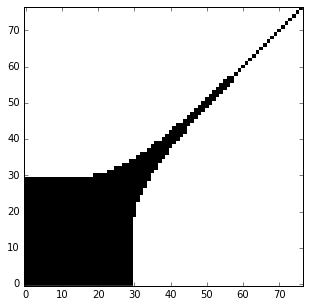

channel 1


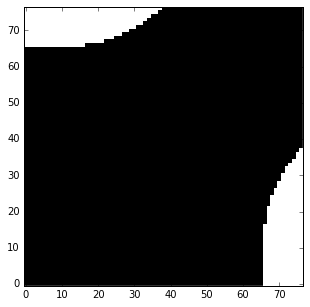

channel 2


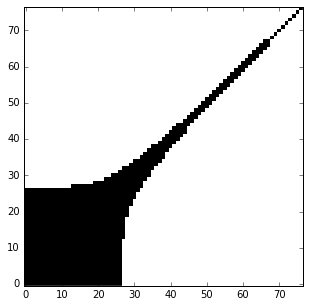

channel 3


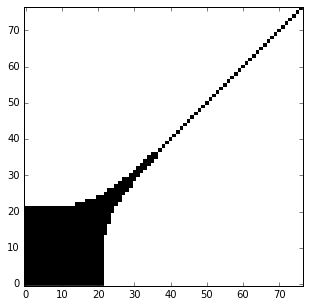

channel 4


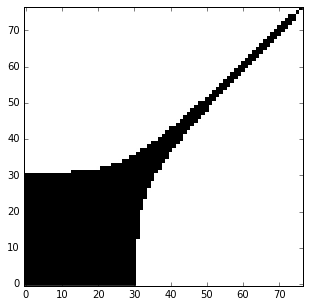

channel 5


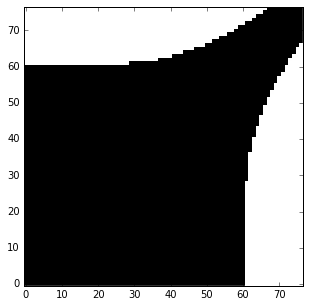

channel 6


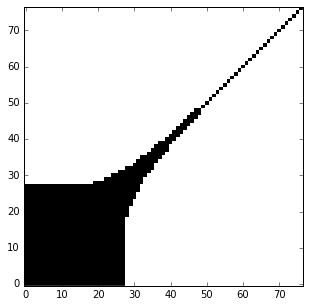

channel 7


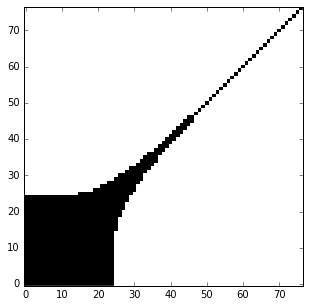

channel 8


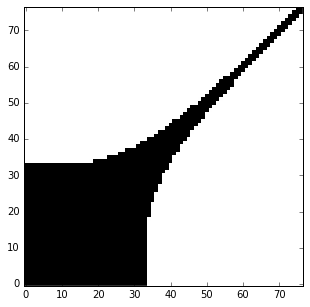

channel 9


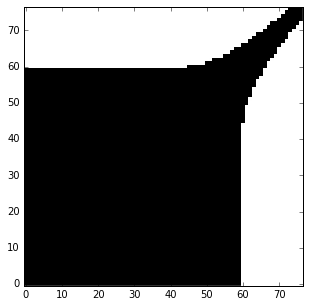

channel 10


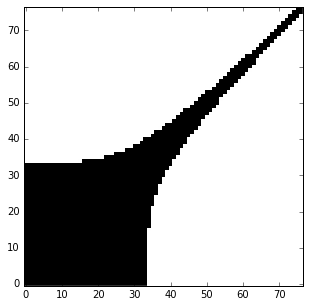

channel 11


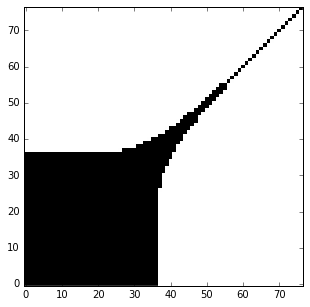

channel 12


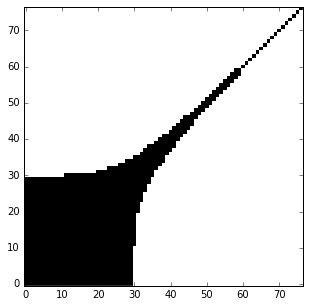

channel 13


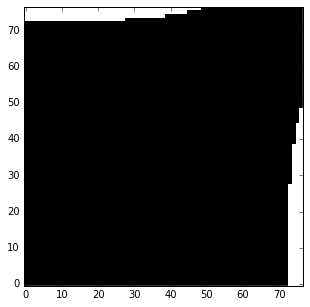

In [67]:
# infra-low
for i in range(14):
    print('channel', i)
    recurrence_plot(train_banded[0, :, i], epsilon=0.0005)

channel 14


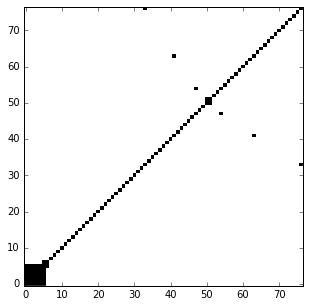

channel 15


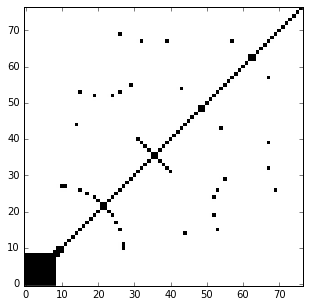

channel 16


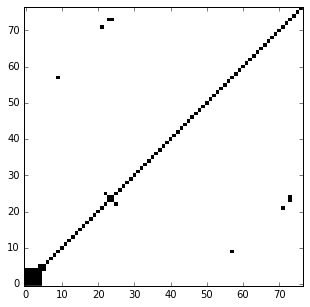

channel 17


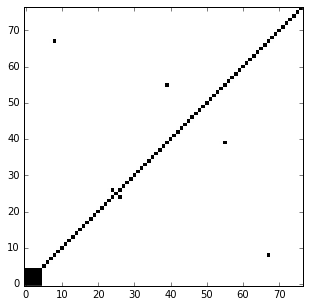

channel 18


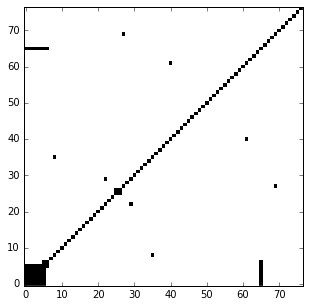

channel 19


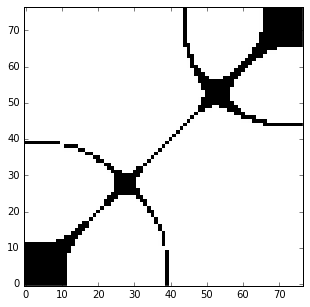

channel 20


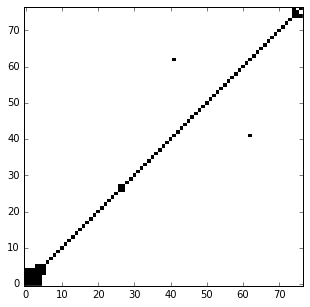

channel 21


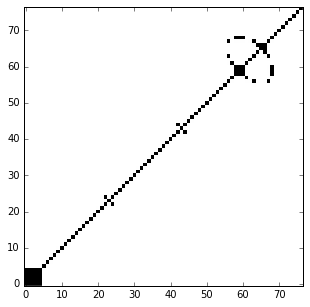

channel 22


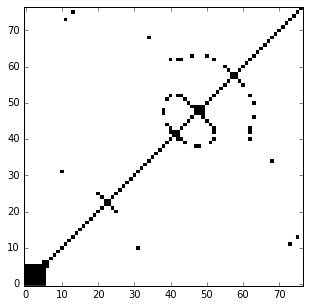

channel 23


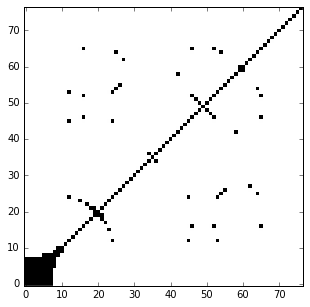

channel 24


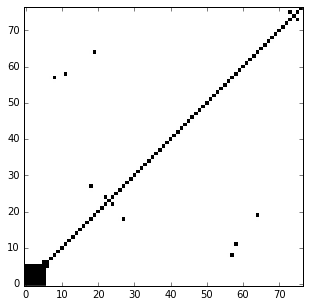

channel 25


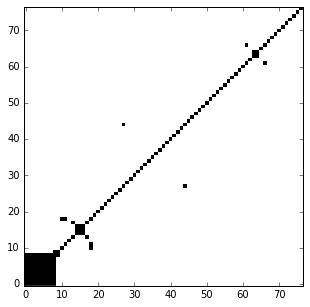

channel 26


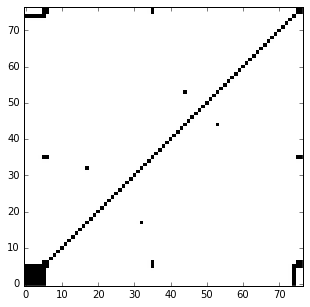

channel 27


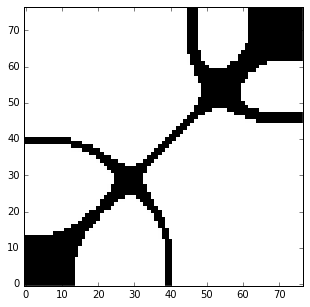

In [68]:
# delta
for i in range(14, 28):
    print('channel', i)
    recurrence_plot(train_banded[0, :, i], epsilon=0.0005)

channel 28


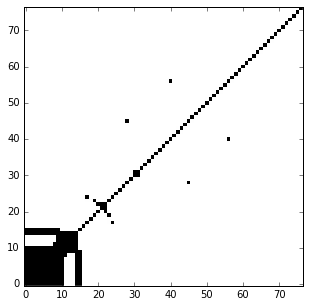

channel 29


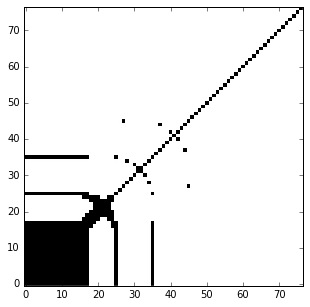

channel 30


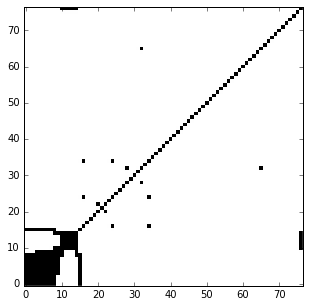

channel 31


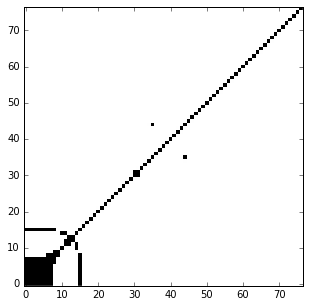

channel 32


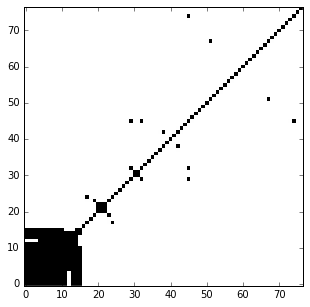

channel 33


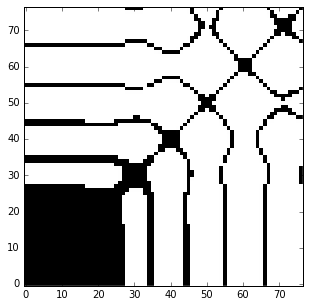

channel 34


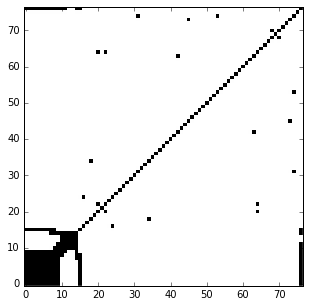

channel 35


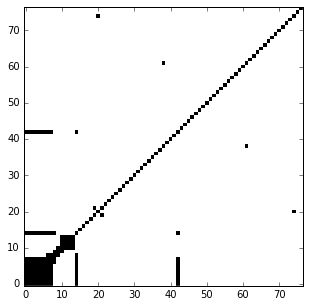

channel 36


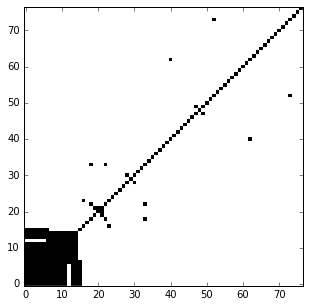

channel 37


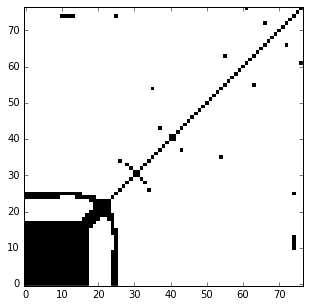

channel 38


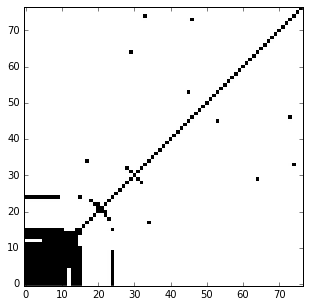

channel 39


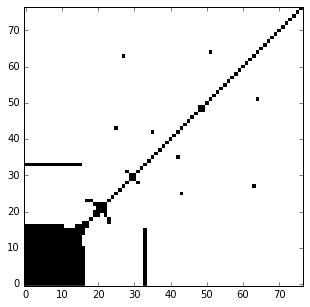

channel 40


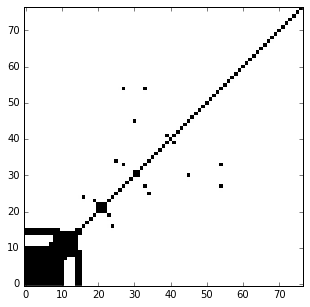

channel 41


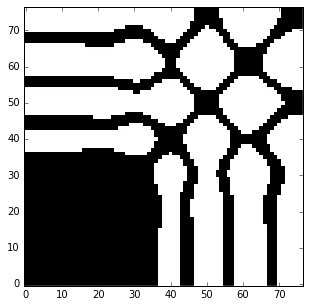

In [69]:
# theta
for i in range(28, 42):
    print('channel', i)
    recurrence_plot(train_banded[0, :, i], epsilon=0.0005)

channel 42


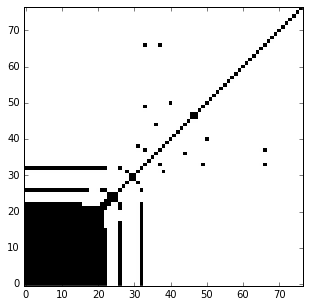

channel 43


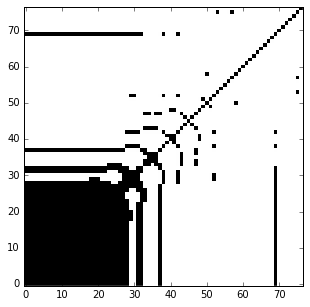

channel 44


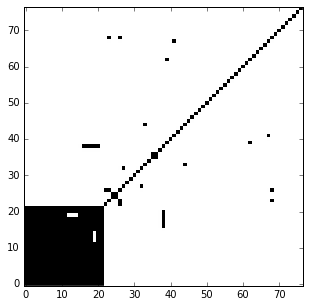

channel 45


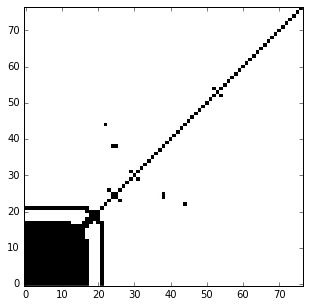

channel 46


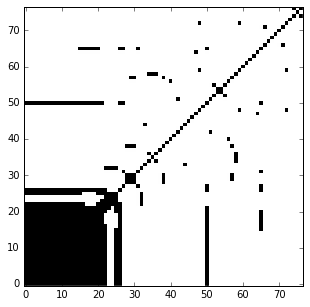

channel 47


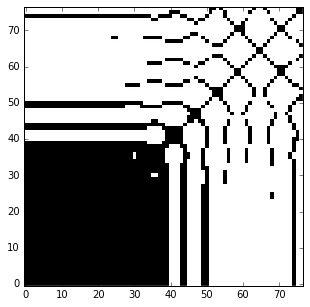

channel 48


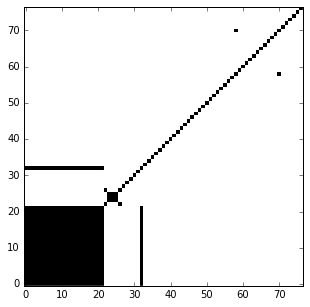

channel 49


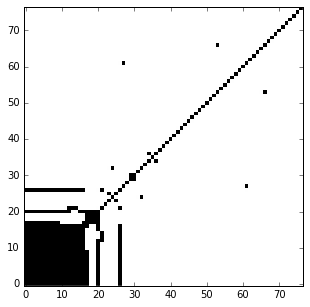

channel 50


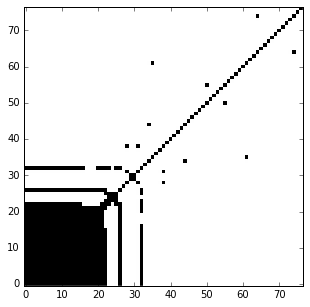

channel 51


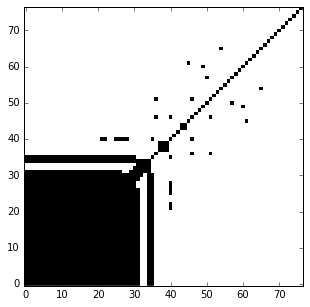

channel 52


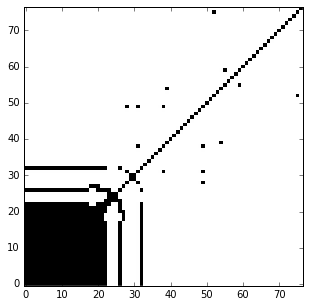

channel 53


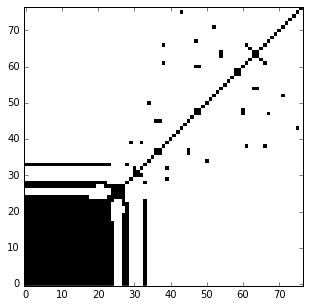

channel 54


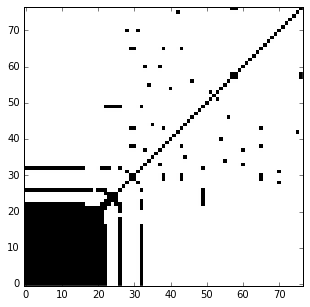

channel 55


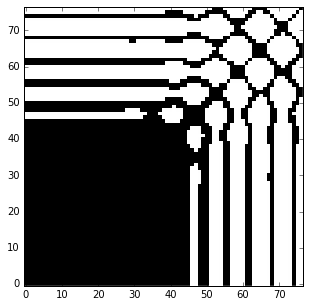

In [70]:
# alpha-m
for i in range(42, 56):
    print('channel', i)
    recurrence_plot(train_banded[0, :, i], epsilon=0.0005)

channel 56


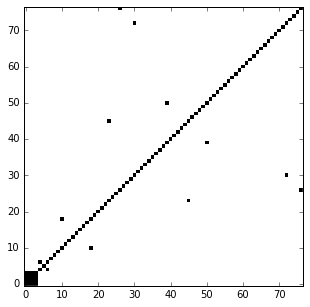

channel 57


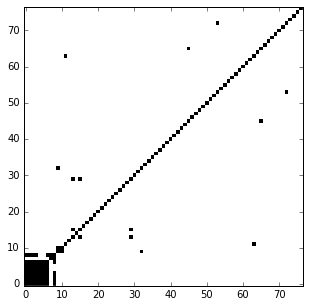

channel 58


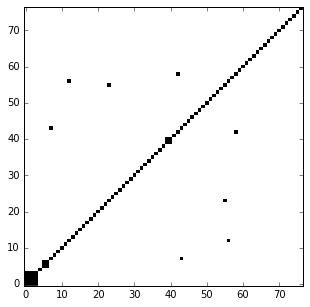

channel 59


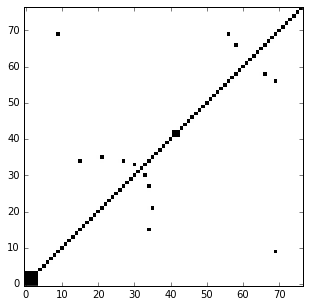

channel 60


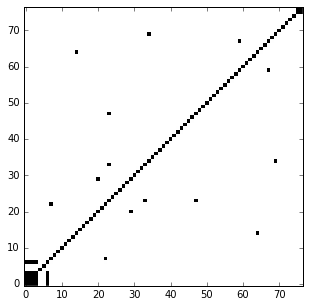

channel 61


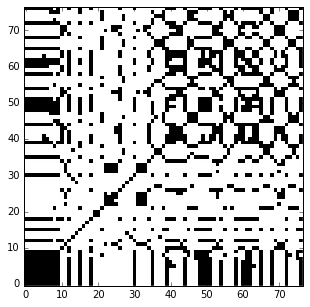

channel 62


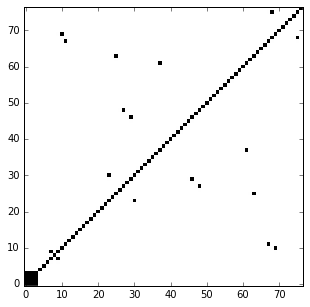

channel 63


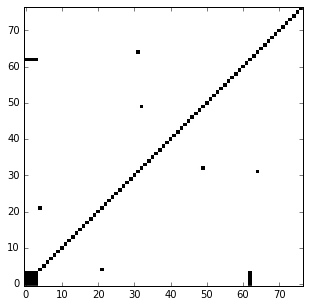

channel 64


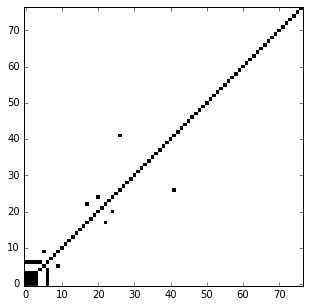

channel 65


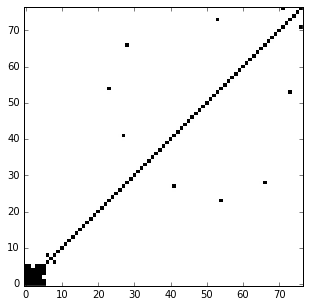

channel 66


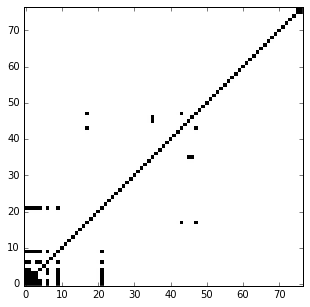

channel 67


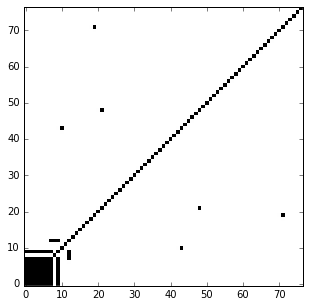

channel 68


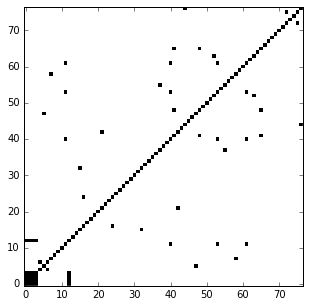

channel 69


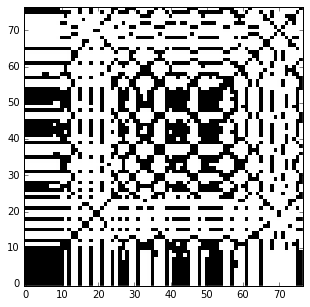

In [71]:
# beta
for i in range(56, 70):
    print('channel', i)
    recurrence_plot(train_banded[0, :, i], epsilon=0.0005)

channel 70


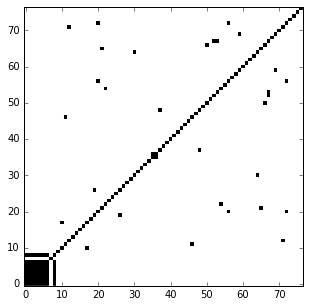

channel 71


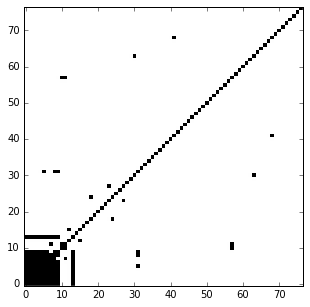

channel 72


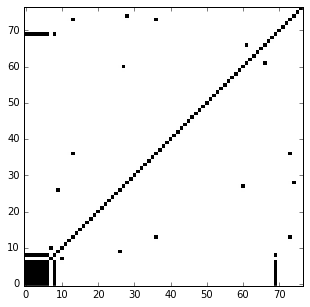

channel 73


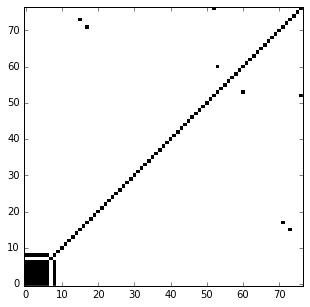

channel 74


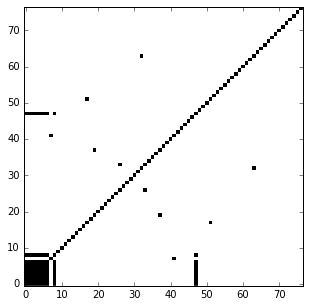

channel 75


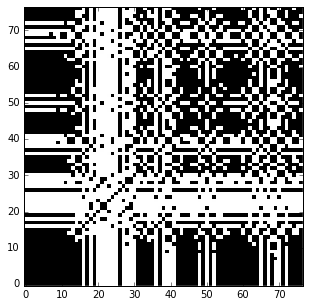

channel 76


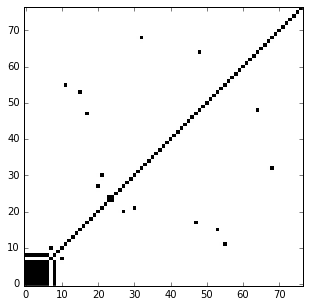

channel 77


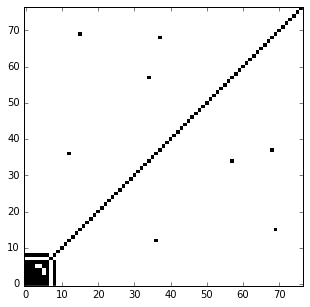

channel 78


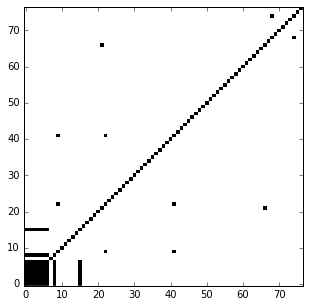

channel 79


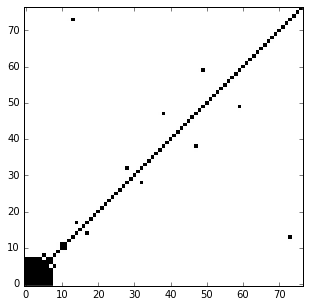

channel 80


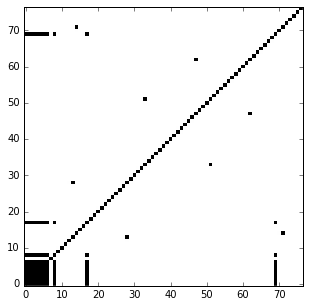

channel 81


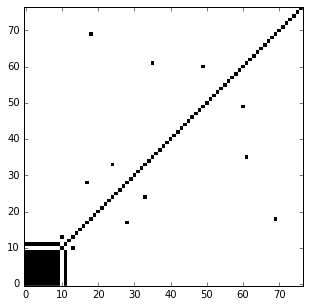

channel 82


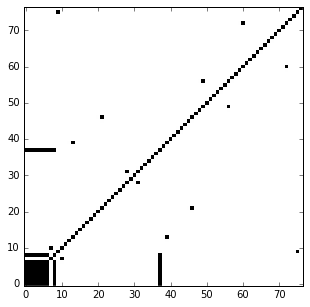

channel 83


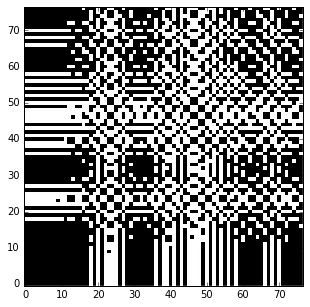

In [72]:
# gamma
for i in range(70, 84):
    print('channel', i)
    recurrence_plot(train_banded[0, :, i], epsilon=0.0005)

Matching min_l

In [73]:
# infra-low
for i in range(14):
    print('channel', i)
    print('    ', DET_and_mean_diag_length(train_banded[one_start, :, i], epsilon=0.0005, min_l=5))

channel 0
     (0.96219281663516065, 16.419354838709676)
channel 1
     (0.97804610318331509, 18.957446808510639)
channel 2
     (0.98107852412488172, 22.063829787234042)
channel 3
     (0.98025666337611062, 19.470588235294116)
channel 4
     (0.97581620314389361, 18.767441860465116)
channel 5
     (0.99541809851088203, 37.782608695652172)
channel 6
     (0.99247837532907113, 28.376344086021504)
channel 7
     (0.98089780324737341, 20.137254901960784)
channel 8
     (0.98180163785259322, 20.358490566037737)
channel 9
     (0.97329773030707611, 17.780487804878049)
channel 10
     (0.95316159250585475, 15.074074074074074)
channel 11
     (0.95807127882599585, 15.758620689655173)
channel 12
     (0.95807127882599585, 15.758620689655173)
channel 13
     (0.99662674987350308, 40.751724137931035)


In [74]:
# delta
for i in range(14, 28):
    print('channel', i)
    print('    ', DET_and_mean_diag_length(train_banded[0, :, i], epsilon=0.0005, min_l=5))

channel 14
     (0.76068376068376065, 29.666666666666668)
channel 15
     (0.65517241379310343, 14.777777777777779)
channel 16
     (0.78378378378378377, 29.0)
channel 17
     (0.74757281553398058, 77.0)
channel 18
     (0.66917293233082709, 29.666666666666668)
channel 19
     (0.65112262521588948, 12.161290322580646)
channel 20
     (0.79816513761467889, 29.0)
channel 21
     (0.61599999999999999, 77.0)
channel 22
     (0.51445086705202314, 29.666666666666668)
channel 23
     (0.63076923076923075, 17.571428571428573)
channel 24
     (0.73553719008264462, 29.666666666666668)
channel 25
     (0.7751479289940828, 14.555555555555555)
channel 26
     (0.6223776223776224, 29.666666666666668)
channel 27
     (0.68204121687929342, 14.787234042553191)


In [75]:
# theta
for i in range(28, 42):
    print('channel', i)
    print('    ', DET_and_mean_diag_length(train_banded[0, :, i], epsilon=0.0005, min_l=5))

channel 28
     (0.71003717472118955, 14.692307692307692)
channel 29
     (0.75828460038986356, 14.407407407407407)
channel 30
     (0.69432314410480345, 14.454545454545455)
channel 31
     (0.70414201183431957, 17.0)
channel 32
     (0.77981651376146788, 15.0)
channel 33
     (0.58721334259902713, 16.568627450980394)
channel 34
     (0.63018867924528299, 15.181818181818182)
channel 35
     (0.6512820512820513, 18.142857142857142)
channel 36
     (0.72815533980582525, 15.0)
channel 37
     (0.76031434184675839, 14.333333333333334)
channel 38
     (0.69275362318840583, 15.933333333333334)
channel 39
     (0.80246913580246915, 13.0)
channel 40
     (0.70034843205574915, 15.461538461538462)
channel 41
     (0.67722698471859855, 16.669724770642201)


In [76]:
# alpha-m
for i in range(42, 56):
    print('channel', i)
    print('    ', DET_and_mean_diag_length(train_banded[0, :, i], epsilon=0.0005, min_l=5))

channel 42
     (0.81132075471698117, 15.108108108108109)
channel 43
     (0.72127139364303183, 18.061224489795919)
channel 44
     (0.88987566607460034, 14.314285714285715)
channel 45
     (0.83066361556064072, 13.444444444444445)
channel 46
     (0.71214017521902373, 15.378378378378379)
channel 47
     (0.71643774922463443, 22.150684931506849)
channel 48
     (0.87521079258010115, 14.828571428571429)
channel 49
     (0.76445396145610278, 13.222222222222221)
channel 50
     (0.80897250361794504, 15.108108108108109)
channel 51
     (0.85173247381144235, 19.218181818181819)
channel 52
     (0.80369843527738261, 15.27027027027027)
channel 53
     (0.75666280417149478, 15.926829268292684)
channel 54
     (0.76534788540245569, 15.162162162162161)
channel 55
     (0.68288950107131929, 25.643678160919539)


In [77]:
# beta
for i in range(56, 70):
    print('channel', i)
    print('    ', DET_and_mean_diag_length(train_banded[0, :, i], epsilon=0.0005, min_l=5))

channel 56
     (0.76237623762376239, 77.0)
channel 57
     (0.67346938775510201, 19.800000000000001)
channel 58
     (0.76237623762376239, 77.0)
channel 59
     (0.73333333333333328, 77.0)
channel 60
     (0.68141592920353977, 77.0)
channel 61
     (0.17736808645899554, 8.454545454545455)
channel 62
     (0.71962616822429903, 77.0)
channel 63
     (0.74757281553398058, 77.0)
channel 64
     (0.71962616822429903, 77.0)
channel 65
     (0.74358974358974361, 29.0)
channel 66
     (0.5539568345323741, 77.0)
channel 67
     (0.70186335403726707, 16.142857142857142)
channel 68
     (0.57037037037037042, 77.0)
channel 69
     (0.26497364638236703, 7.3733333333333331)


In [78]:
# gamma
for i in range(70, 84):
    print('channel', i)
    print('    ', DET_and_mean_diag_length(train_banded[0, :, i], epsilon=0.0005, min_l=5))

channel 70
     (0.59999999999999998, 19.800000000000001)
channel 71
     (0.69377990430622005, 13.181818181818182)
channel 72
     (0.59999999999999998, 19.800000000000001)
channel 73
     (0.7021276595744681, 19.800000000000001)
channel 74
     (0.62264150943396224, 19.800000000000001)
channel 75
     (0.49492966961072948, 8.2677595628415297)
channel 76
     (0.6556291390728477, 19.800000000000001)
channel 77
     (0.56204379562043794, 77.0)
channel 78
     (0.63057324840764328, 19.800000000000001)
channel 79
     (0.77931034482758621, 16.142857142857142)
channel 80
     (0.56571428571428573, 19.800000000000001)
channel 81
     (0.7386934673366834, 13.363636363636363)
channel 82
     (0.59999999999999998, 19.800000000000001)
channel 83
     (0.53028064992614476, 8.9303482587064682)


Matching approximate entropy

In [79]:
# infra-low
for i in range(14):
    print('channel', i)
    print('    ', pyeeg.ap_entropy(X=train_banded[0, :, i], M=10, R=0.0005))

channel 0
     2.64496799205
channel 1
     0.111170895538
channel 2
     2.55824769974
channel 3
     3.41437149342
channel 4
     2.2353620055
channel 5
     0.443856951142
channel 6
     2.9274650172
channel 7
     3.07274614875
channel 8
     1.99877136006
channel 9
     0.697422834305
channel 10
     1.90185800634
channel 11
     2.42449728245
channel 12
     2.5528799023
channel 13
     0.0648560325898


In [80]:
# delta
for i in range(14, 28):
    print('channel', i)
    print('    ', pyeeg.ap_entropy(X=train_banded[0, :, i], M=10, R=0.0005))

channel 14
     4.12192877694
channel 15
     3.74245966286
channel 16
     4.11411910315
channel 17
     4.16331069816
channel 18
     4.12192877694
channel 19
     2.57572436271
channel 20
     4.12622253921
channel 21
     3.97357614113
channel 22
     3.6834619763
channel 23
     3.7588568612
channel 24
     4.10123781632
channel 25
     4.03564902297
channel 26
     4.11411910315
channel 27
     1.83738076597


In [81]:
# theta
for i in range(28, 42):
    print('channel', i)
    print('    ', pyeeg.ap_entropy(X=train_banded[0, :, i], M=10, R=0.0005))

channel 28
     3.94404235047
channel 29
     3.53498723311
channel 30
     3.93726583294
channel 31
     4.09342814253
channel 32
     3.84626844394
channel 33
     1.86379833672
channel 34
     3.85232016197
channel 35
     4.03916493448
channel 36
     3.89485075546
channel 37
     3.47299422911
channel 38
     3.83338715712
channel 39
     3.70923517582
channel 40
     3.85328342348
channel 41
     0.980989169281


In [82]:
# alpha-m
for i in range(42, 56):
    print('channel', i)
    print('    ', pyeeg.ap_entropy(X=train_banded[0, :, i], M=10, R=0.0005))

channel 42
     3.37767119529
channel 43
     2.64307143897
channel 44
     3.546754012
channel 45
     3.72684031529
channel 46
     3.00715982055
channel 47
     1.43999670484
channel 48
     3.61644236215
channel 49
     3.69282735161
channel 50
     3.39415343872
channel 51
     2.78026143838
channel 52
     3.36712146049
channel 53
     3.02007246478
channel 54
     3.11898991136
channel 55
     0.877039005632


In [83]:
# beta
for i in range(56, 70):
    print('channel', i)
    print('    ', pyeeg.ap_entropy(X=train_banded[0, :, i], M=10, R=0.0005))

channel 56
     4.10123781632
channel 57
     4.09342814253
channel 58
     4.12192877694
channel 59
     4.06414965737
channel 60
     4.06414965737
channel 61
     1.65234446785
channel 62
     4.03916493448
channel 63
     4.16331069816
channel 64
     4.14261973755
channel 65
     4.10123781632
channel 66
     4.09772190481
channel 67
     4.14261973755
channel 68
     3.92790045762
channel 69
     1.30427248111


In [84]:
# gamma
for i in range(70, 84):
    print('channel', i)
    print('    ', pyeeg.ap_entropy(X=train_banded[0, :, i], M=10, R=0.0005))

channel 70
     3.89081229867
channel 71
     4.05204622131
channel 72
     4.09342814253
channel 73
     4.12192877694
channel 74
     4.12192877694
channel 75
     0.952905051761
channel 76
     4.03916493448
channel 77
     4.12192877694
channel 78
     4.14261973755
channel 79
     4.08054685571
channel 80
     4.10123781632
channel 81
     4.08054685571
channel 82
     4.10123781632
channel 83
     0.67159140277


Matching sample entropy

In [85]:
# infra-low
for i in range(14):
    print('channel', i)
    print('    ', pyeeg.samp_entropy(X=train_banded[0, :, i], M=10, R=0.005))

channel 0
     0.726171154294
channel 1
     0.0298529631497
channel 2
     0.662029717429
channel 3
     1.42843416826
channel 4
     0.516548729856
channel 5
     0.0298529631497
channel 6
     0.951131236535
channel 7
     1.05019846522
channel 8
     0.358935115669
channel 9
     0.0298529631497
channel 10
     0.257416035511
channel 11
     0.671435515716
channel 12
     0.655244280029
channel 13
     0.0298529631497


In [86]:
# delta
for i in range(14, 28):
    print('channel', i)
    print('    ', pyeeg.samp_entropy(X=train_banded[0, :, i], M=10, R=0.005))

channel 14
     3.8392328459
channel 15
     2.12893432313
channel 16
     4.17570508252
channel 17
     5.24614649422
channel 18
     3.8598521331
channel 19
     0.791799197966
channel 20
     4.17570508252
channel 21
     3.20926456696
channel 22
     2.12893432313
channel 23
     2.07506133319
channel 24
     3.30023634516
channel 25
     3.37434431732
channel 26
     3.60391875896
channel 27
     0.281555138624


In [87]:
# theta
for i in range(28, 42):
    print('channel', i)
    print('    ', pyeeg.samp_entropy(X=train_banded[0, :, i], M=10, R=0.005))

channel 28
     2.72710683806
channel 29
     1.95650159846
channel 30
     3.07709279385
channel 31
     3.94686351009
channel 32
     2.44784941527
channel 33
     0.0894887027462
channel 34
     2.79657921088
channel 35
     3.40031980372
channel 36
     2.70061522261
channel 37
     1.95650159846
channel 38
     2.57776154951
channel 39
     2.46319498494
channel 40
     2.69410054159
channel 41
     0.0298529631497


In [88]:
# alpha-m
for i in range(42, 56):
    print('channel', i)
    print('    ', pyeeg.samp_entropy(X=train_banded[0, :, i], M=10, R=0.005))

channel 42
     1.59982665452
channel 43
     0.906679473964
channel 44
     2.07856396374
channel 45
     2.34198141419
channel 46
     1.23427815382
channel 47
     0.0316637377504
channel 48
     2.06462645589
channel 49
     2.42278544661
channel 50
     1.90505303663
channel 51
     1.10168989057
channel 52
     1.72469998441
channel 53
     1.41028484976
channel 54
     1.48494637853
channel 55
     0.0298529631497


In [89]:
# beta
for i in range(56, 70):
    print('channel', i)
    print('    ', pyeeg.samp_entropy(X=train_banded[0, :, i], M=10, R=0.005))

channel 56
     3.52636052462
channel 57
     3.81903013858
channel 58
     3.72371995877
channel 59
     4.55299931366
channel 60
     3.70570145327
channel 61
     0.0458095360313
channel 62
     3.27670584775
channel 63
     4.36375731402
channel 64
     3.99338352572
channel 65
     4.20469261939
channel 66
     3.96985302831
channel 67
     4.59555892808
channel 68
     3.24241677427
channel 69
     0.0298529631497


In [90]:
# gamma
for i in range(70, 84):
    print('channel', i)
    print('    ', pyeeg.samp_entropy(X=train_banded[0, :, i], M=10, R=0.005))

channel 70
     2.85585582081
channel 71
     3.51154543883
channel 72
     2.96887920921
channel 73
     3.6535157001
channel 74
     3.48255790196
channel 75
     0.0298529631497
channel 76
     3.14608566534
channel 77
     4.06749149788
channel 78
     3.77980942543
channel 79
     3.57217006065
channel 80
     3.31221253621
channel 81
     3.19845365085
channel 82
     2.76820851375
channel 83
     0.0298529631497


Matching autocorrelation

channel 0
     0.0108036248504 77.0


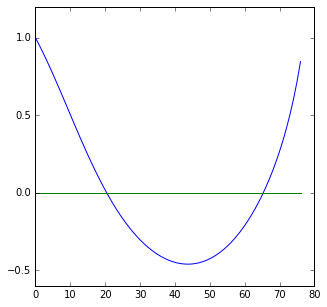

channel 1
     0.0111695042871 77.0


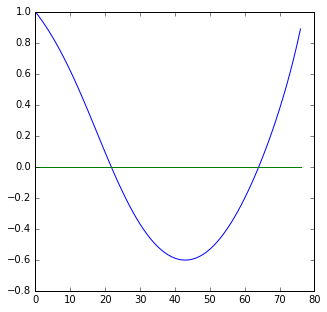

channel 2
     0.0115294267533 77.0


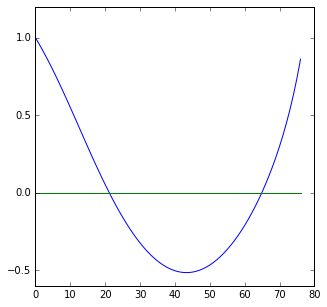

channel 3
     0.0110583993785 77.0


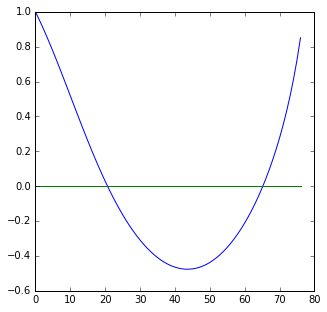

channel 4
     0.0109442618146 77.0


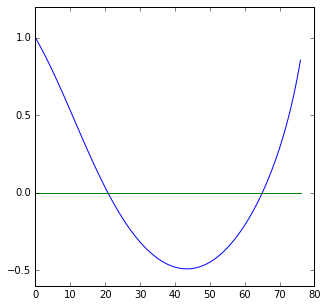

channel 5
     0.0104389782505 77.0


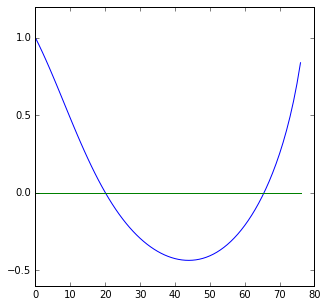

channel 6
     0.0106696625798 77.0


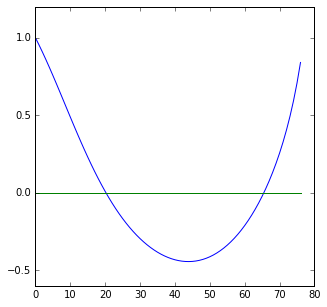

channel 7
     0.0110934837262 77.0


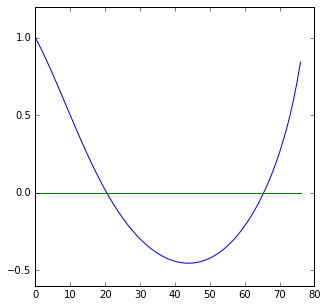

channel 8
     0.0111253127324 77.0


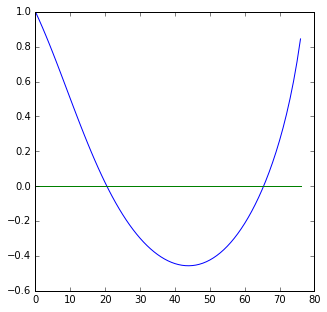

channel 9
     0.00601148372028 77.0


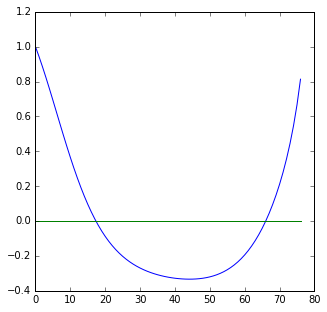

channel 10
     0.0115479271143 77.0


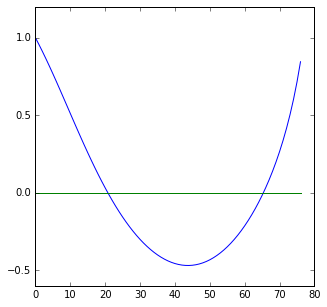

channel 11
     0.00902098298479 77.0


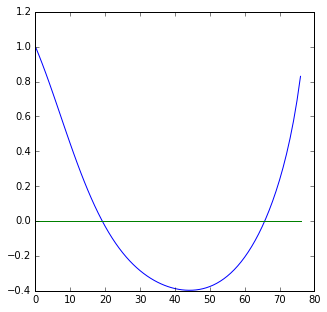

channel 12
     0.0108510500049 77.0


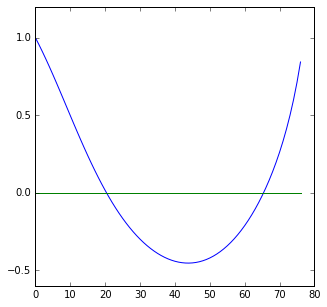

channel 13
     0.0103345026693 77.0


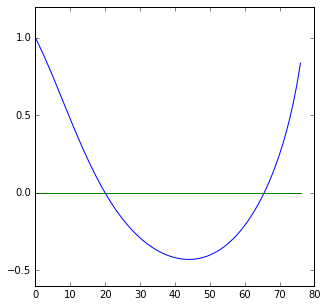

In [91]:
# infra-low
for i in range(14):
    print('channel', i)
    print('    ', mean_autocorrelation(train_banded[0, :, i].ravel(), max_lag=train_banded[0, :, i].shape[0] - 1),
                  mean_period(train_banded[0, :, i].ravel(), max_lag=train_banded[0, :, i].shape[0] - 1))
    plt.plot(normalized_autocorrelation(train_banded[0, :, i], train_banded[0, :, i].shape[0] - 1))
    plt.plot(np.zeros(train_banded[0, :, i].shape[0]))
    plt.show()

channel 14
     0.0113168502669 77.0


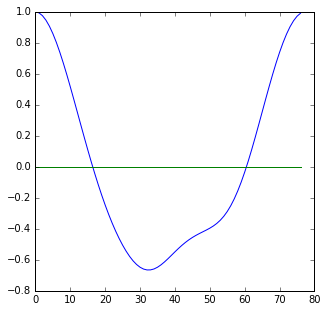

channel 15
     -0.0019556550706 25.6666666667


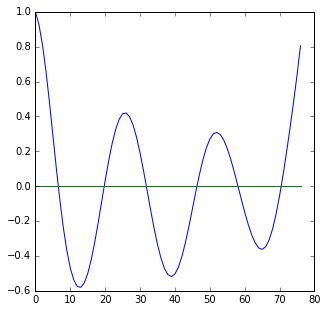

channel 16
     0.00636425634565 38.5


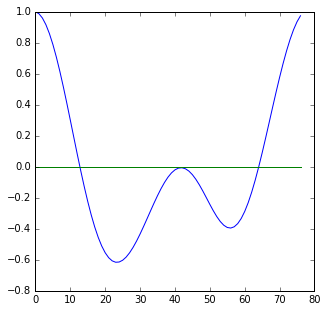

channel 17
     0.0124809819157 38.5


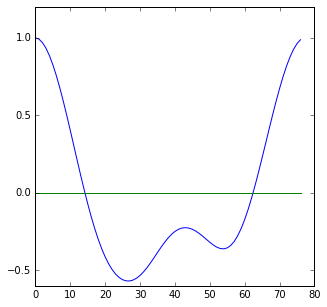

channel 18
     0.00673724038486 38.5


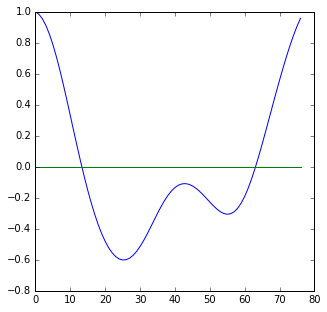

channel 19
     0.00340947972194 77.0


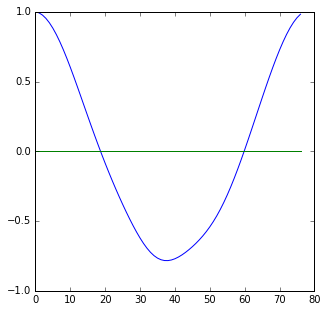

channel 20
     0.0114672600249 38.5


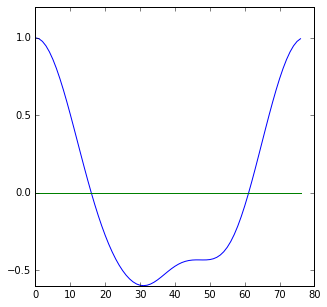

channel 21
     0.0059614665109 77.0


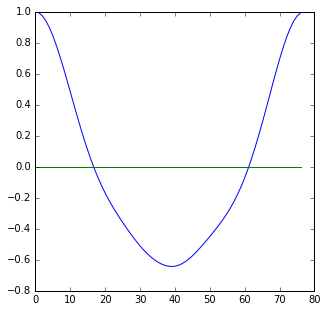

channel 22
     0.00916941028264 77.0


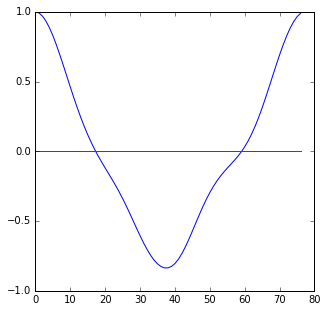

channel 23
     -0.00283201799773 25.6666666667


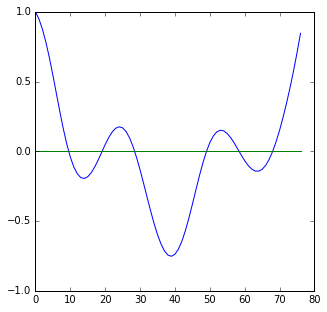

channel 24
     0.00321477602174 38.5


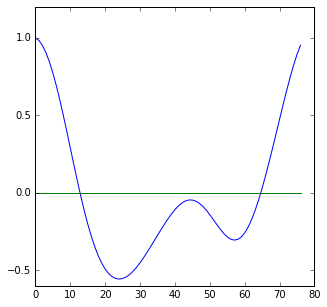

channel 25
     -0.00422697896936 77.0


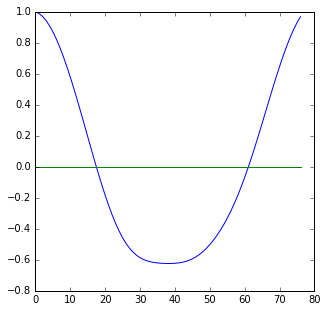

channel 26
     0.0118989838423 38.5


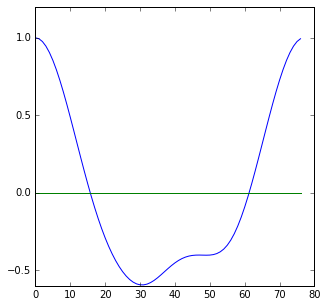

channel 27
     0.00226276109834 77.0


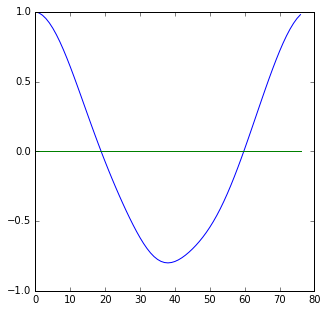

In [92]:
# delta
for i in range(14, 28):
    print('channel', i)
    print('    ', mean_autocorrelation(train_banded[0, :, i].ravel(), max_lag=train_banded[0, :, i].shape[0] - 1),
                  mean_period(train_banded[0, :, i].ravel(), max_lag=train_banded[0, :, i].shape[0] - 1))
    plt.plot(normalized_autocorrelation(train_banded[0, :, i], train_banded[0, :, i].shape[0] - 1))
    plt.plot(np.zeros(train_banded[0, :, i].shape[0]))
    plt.show()

channel 28
     0.000980378772907 19.25


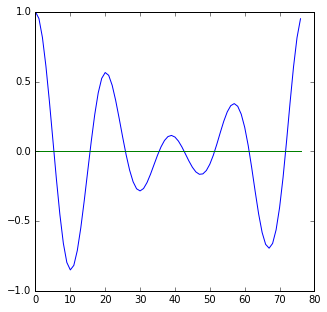

channel 29
     0.00138741781532 19.25


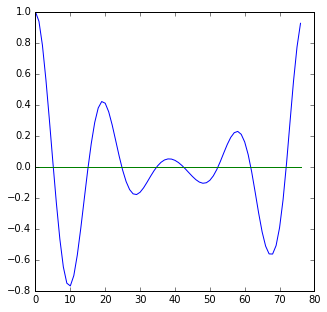

channel 30
     0.000681694537982 19.25


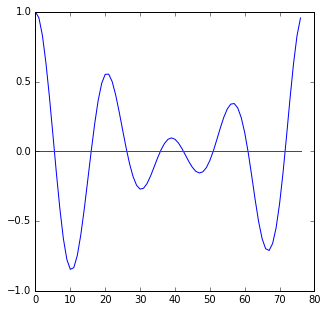

channel 31
     0.000836588252947 19.25


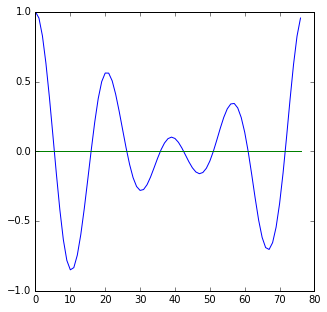

channel 32
     0.00068862792362 19.25


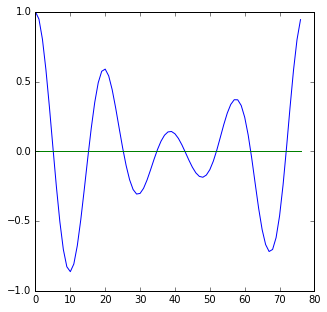

channel 33
     -1.78773742502e-05 19.25


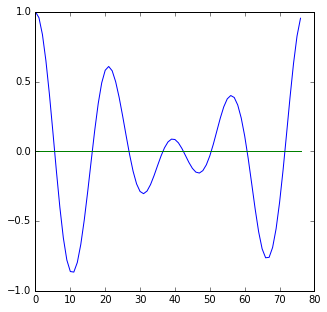

channel 34
     -0.000333558991967 19.25


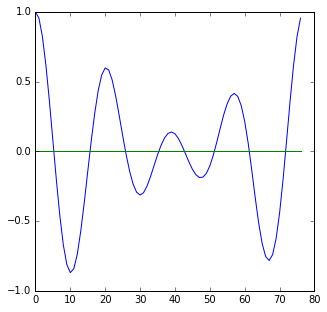

channel 35
     0.000684851810172 19.25


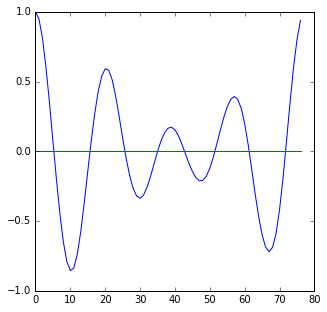

channel 36
     0.0011787875763 19.25


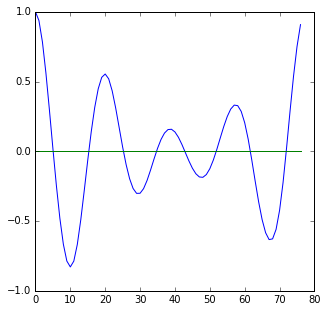

channel 37
     0.00131207666815 19.25


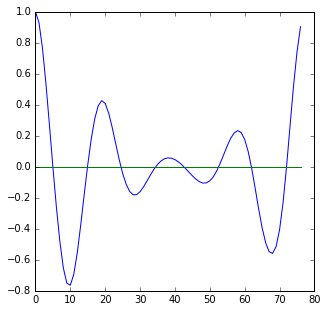

channel 38
     0.00120636273744 19.25


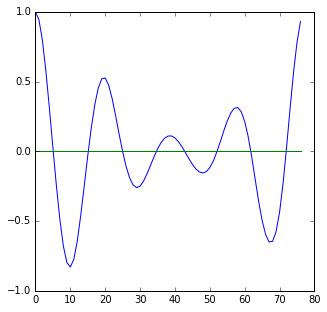

channel 39
     0.00128290388735 19.25


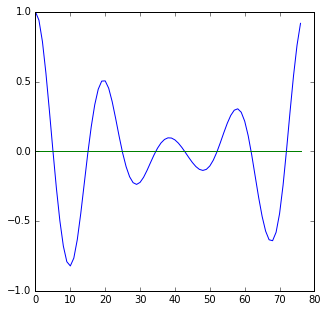

channel 40
     0.000981499377248 19.25


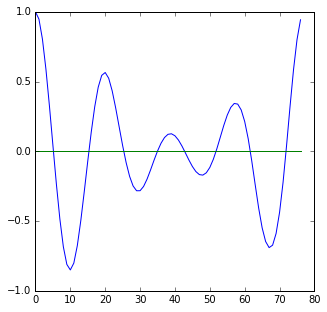

channel 41
     3.58522882834e-05 19.25


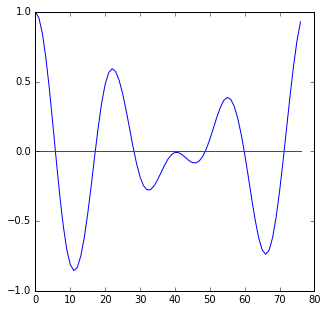

In [93]:
# theta
for i in range(28, 42):
    print('channel', i)
    print('    ', mean_autocorrelation(train_banded[0, :, i].ravel(), max_lag=train_banded[0, :, i].shape[0] - 1),
                  mean_period(train_banded[0, :, i].ravel(), max_lag=train_banded[0, :, i].shape[0] - 1))
    plt.plot(normalized_autocorrelation(train_banded[0, :, i], train_banded[0, :, i].shape[0] - 1))
    plt.plot(np.zeros(train_banded[0, :, i].shape[0]))
    plt.show()

channel 42
     0.000276554606913 11.0


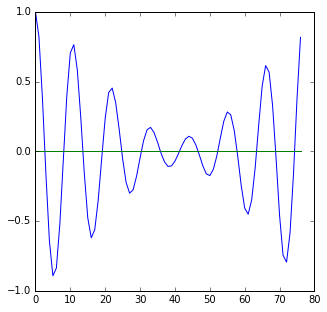

channel 43
     0.000638705274491 11.0


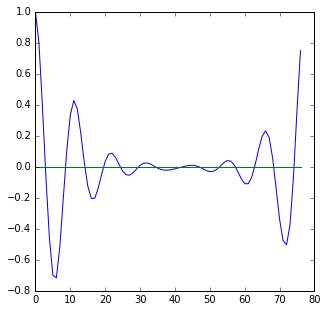

channel 44
     -0.000136938508221 12.8333333333


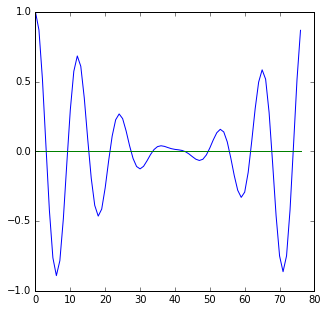

channel 45
     -2.31175145936e-05 11.0


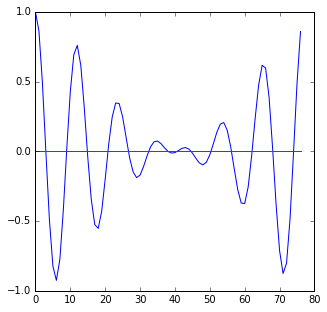

channel 46
     0.000107552376954 12.8333333333


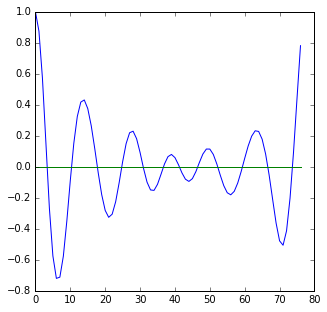

channel 47
     0.000175688164454 11.0


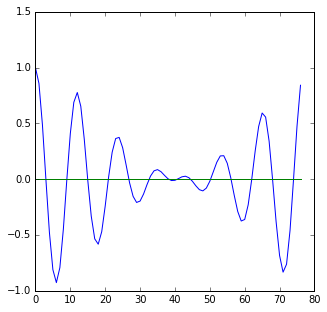

channel 48
     0.000170861430743 11.0


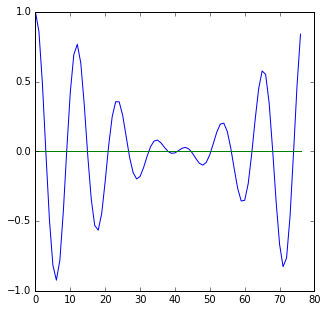

channel 49
     0.000385460526955 11.0


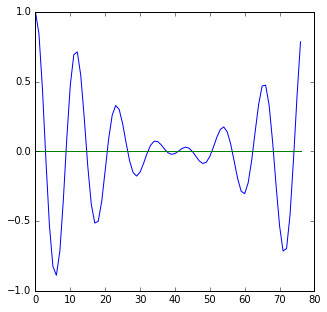

channel 50
     0.000387007222017 11.0


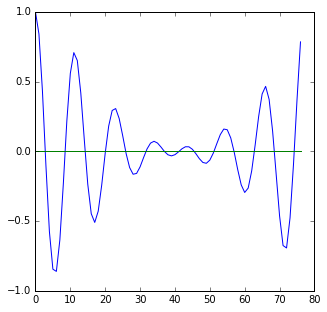

channel 51
     -4.94594674937e-05 11.0


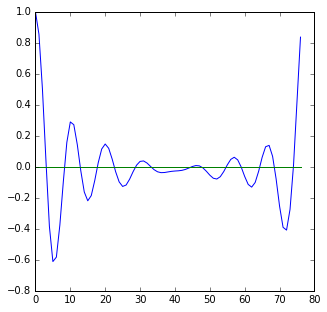

channel 52
     0.000624070828583 11.0


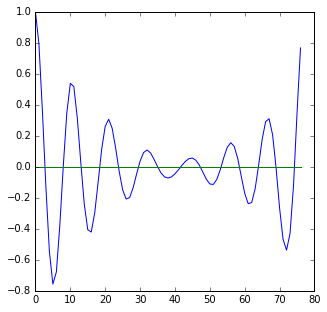

channel 53
     0.00048191989836 11.0


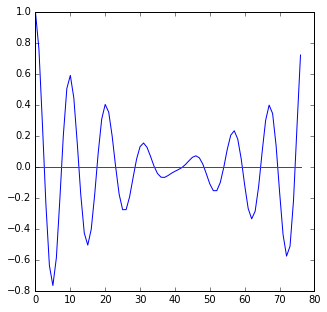

channel 54
     0.000534967107772 11.0


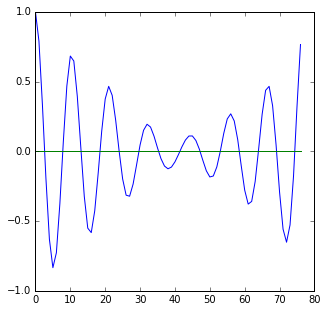

channel 55
     0.000412036249079 11.0


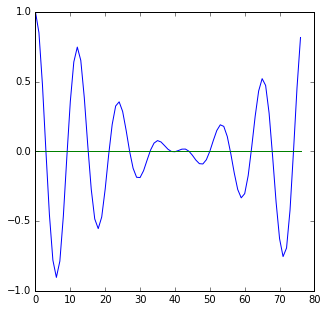

In [94]:
# alpha-m
for i in range(42, 56):
    print('channel', i)
    print('    ', mean_autocorrelation(train_banded[0, :, i].ravel(), max_lag=train_banded[0, :, i].shape[0] - 1),
                  mean_period(train_banded[0, :, i].ravel(), max_lag=train_banded[0, :, i].shape[0] - 1))
    plt.plot(normalized_autocorrelation(train_banded[0, :, i], train_banded[0, :, i].shape[0] - 1))
    plt.plot(np.zeros(train_banded[0, :, i].shape[0]))
    plt.show()

channel 56
     0.000145295867669 6.41666666667


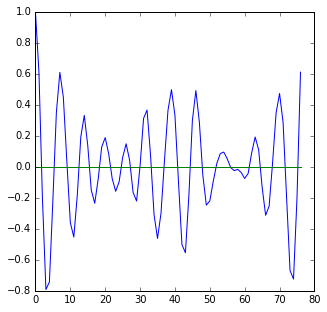

channel 57
     -3.46133074181e-05 5.92307692308


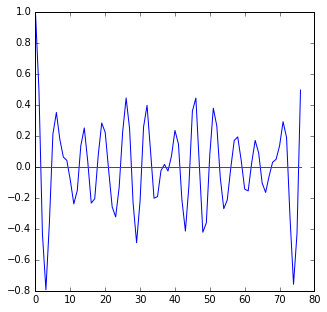

channel 58
     -1.93297679785e-05 6.41666666667


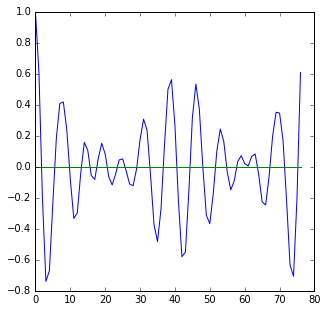

channel 59
     2.99742803326e-05 5.92307692308


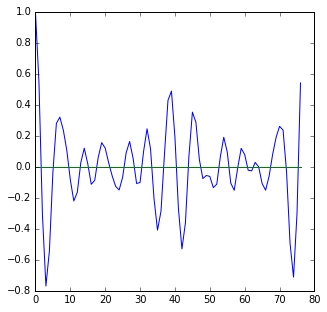

channel 60
     -7.38820393949e-06 5.13333333333


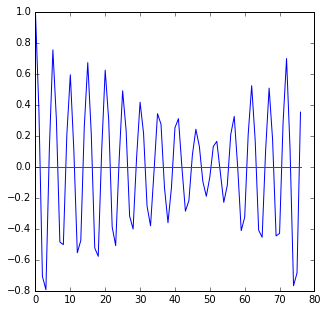

channel 61
     -0.000135702212358 7.0


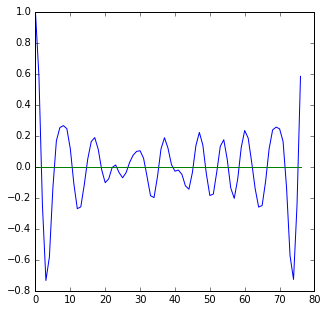

channel 62
     8.27897966715e-05 6.41666666667


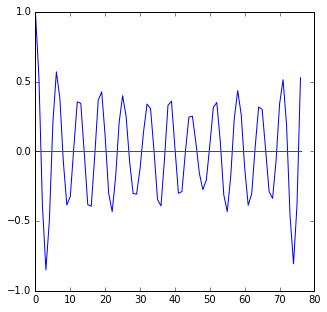

channel 63
     0.000147911496555 4.8125


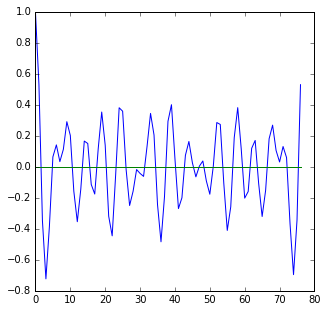

channel 64
     8.63739699557e-05 4.8125


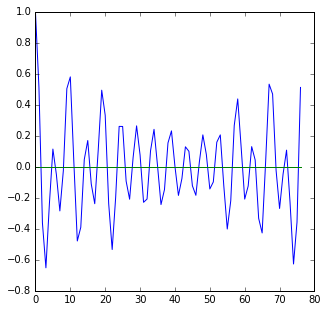

channel 65
     -7.58600643733e-05 5.92307692308


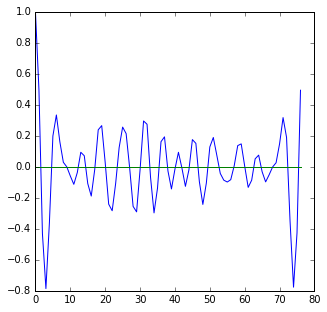

channel 66
     -4.67893498854e-05 5.5


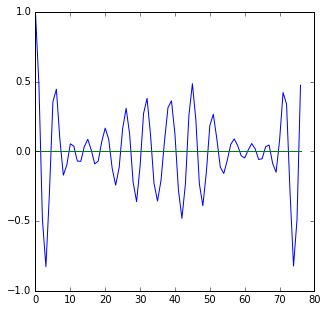

channel 67
     -2.84657339105e-05 5.5


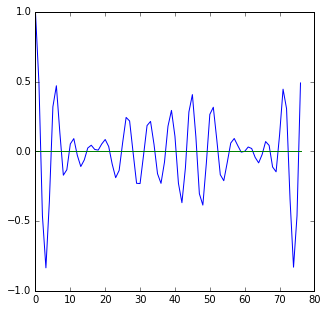

channel 68
     -1.86047801565e-05 5.13333333333


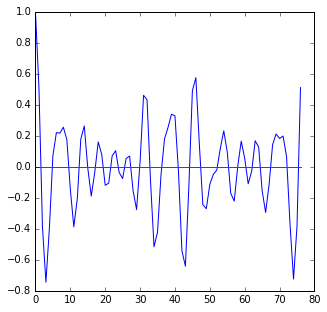

channel 69
     -3.15913294226e-05 5.92307692308


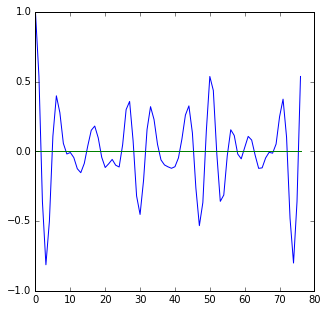

In [95]:
# beta
for i in range(56, 70):
    print('channel', i)
    print('    ', mean_autocorrelation(train_banded[0, :, i].ravel(), max_lag=train_banded[0, :, i].shape[0] - 1),
                  mean_period(train_banded[0, :, i].ravel(), max_lag=train_banded[0, :, i].shape[0] - 1))
    plt.plot(normalized_autocorrelation(train_banded[0, :, i], train_banded[0, :, i].shape[0] - 1))
    plt.plot(np.zeros(train_banded[0, :, i].shape[0]))
    plt.show()

channel 70
     -3.74283006892e-06 3.66666666667


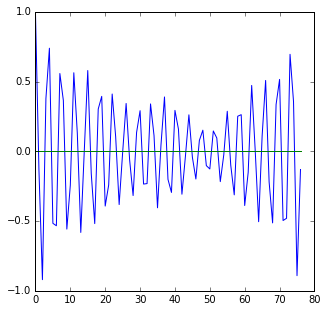

channel 71
     1.87492674783e-05 3.66666666667


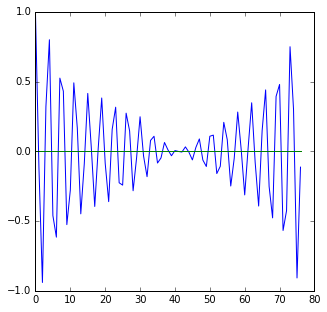

channel 72
     -4.71923366415e-06 3.66666666667


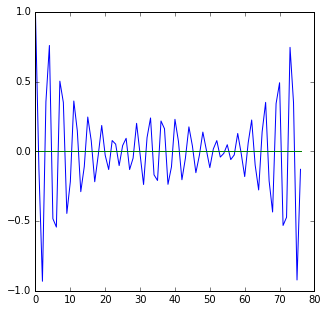

channel 73
     -1.06112603199e-06 3.66666666667


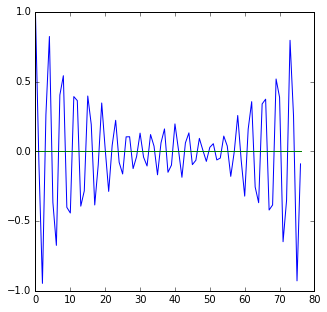

channel 74
     4.14199848268e-05 4.05263157895


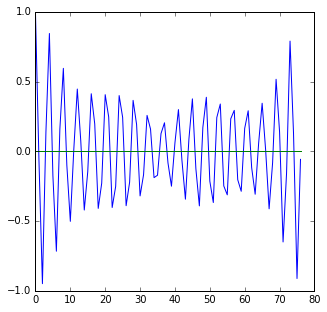

channel 75
     -5.83992711917e-06 3.34782608696


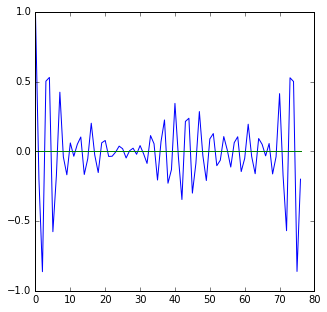

channel 76
     5.80461737629e-05 3.66666666667


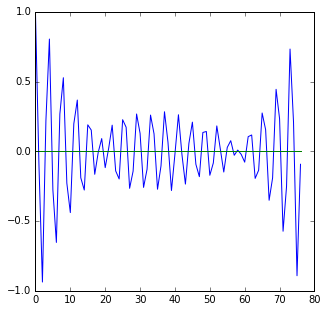

channel 77
     -5.67970503833e-06 3.66666666667


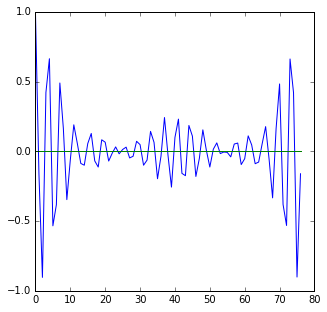

channel 78
     6.84637855999e-06 3.66666666667


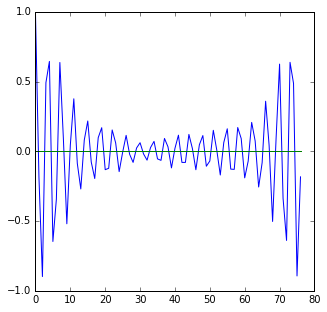

channel 79
     1.39741785411e-05 4.05263157895


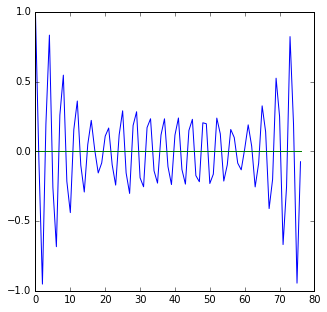

channel 80
     1.76508058757e-06 4.05263157895


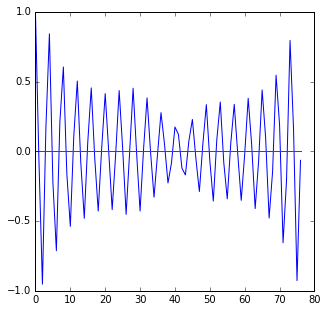

channel 81
     1.3038115825e-06 3.85


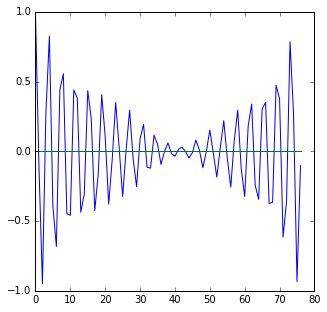

channel 82
     -3.10508723189e-06 4.05263157895


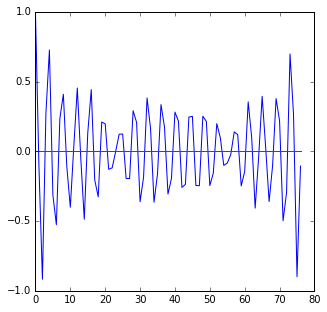

channel 83
     2.0805871832e-05 3.85


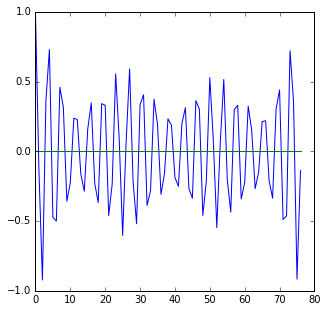

In [96]:
# gamma
for i in range(70, 84):
    print('channel', i)
    print('    ', mean_autocorrelation(train_banded[0, :, i].ravel(), max_lag=train_banded[0, :, i].shape[0] - 1),
                  mean_period(train_banded[0, :, i].ravel(), max_lag=train_banded[0, :, i].shape[0] - 1))
    plt.plot(normalized_autocorrelation(train_banded[0, :, i], train_banded[0, :, i].shape[0] - 1))
    plt.plot(np.zeros(train_banded[0, :, i].shape[0]))
    plt.show()

In [97]:
import scipy.fftpack as fft

In [98]:
train_windowed.shape

(7452, 77, 15)

In [99]:
bandpass_nd = sig.butter(10, np.array([0.5, 42.0]) / 64, btype='bandpass')
bandpassed_window_zero = sig.lfilter(bandpass_nd[0], bandpass_nd[1], train_windowed[0, :, :14], axis=0)
bandpassed_window_one = sig.lfilter(bandpass_nd[0], bandpass_nd[1], train_windowed[one_start, :, :14], axis=0)
transformed_zero = fft.rfft(x=bandpassed_window_zero, axis=0)
transformed_one = fft.rfft(x=bandpassed_window_one, axis=0)

channel 0


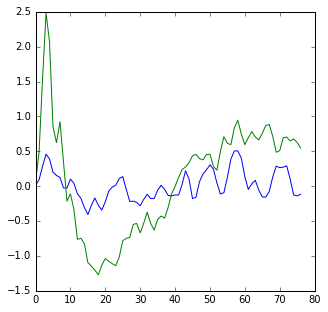

channel 1


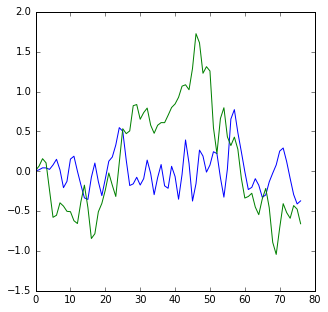

channel 2


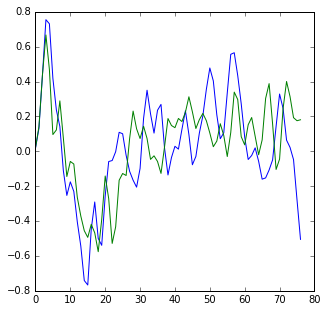

channel 3


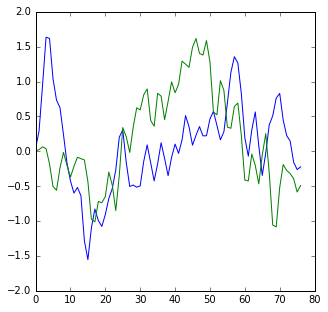

channel 4


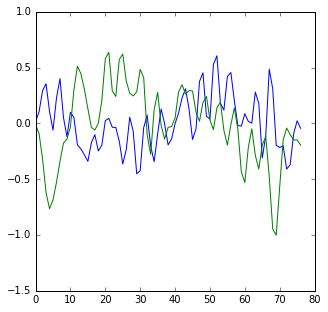

channel 5


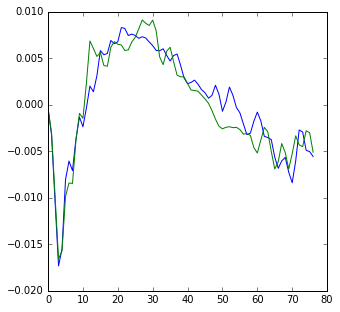

channel 6


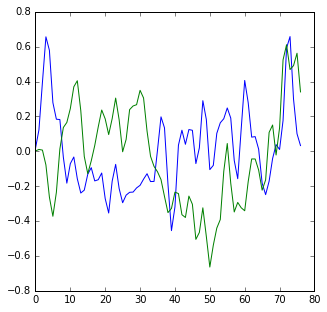

channel 7


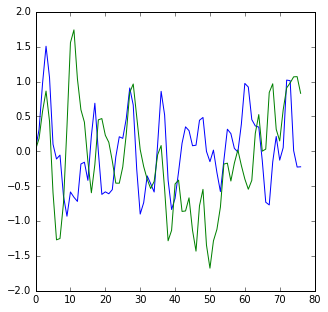

channel 8


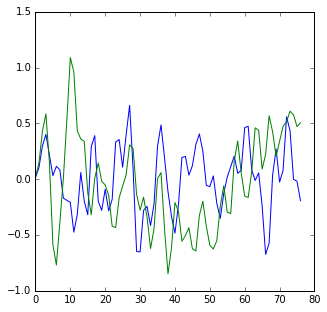

channel 9


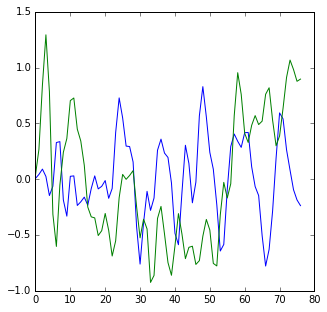

channel 10


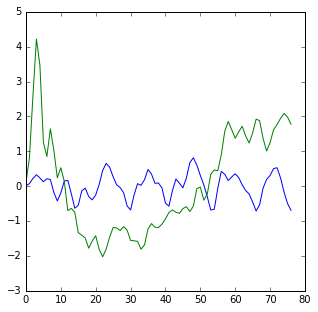

channel 11


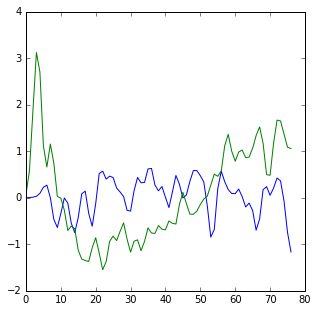

channel 12


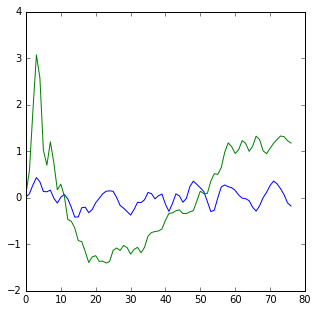

channel 13


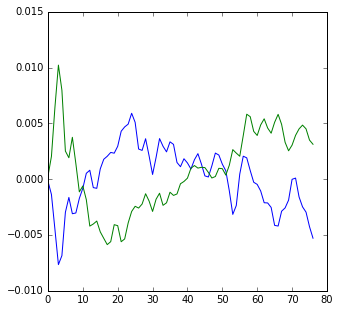

In [100]:
for i in range(14):
    print('channel', i)
    plt.plot(bandpassed_window_zero[:, i])
    plt.plot(bandpassed_window_one[:, i])
    plt.show()

channel 0


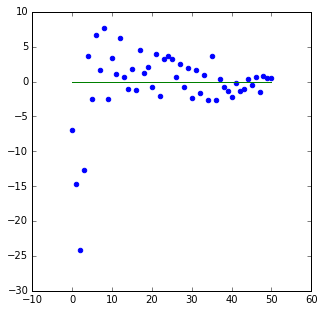

channel 1


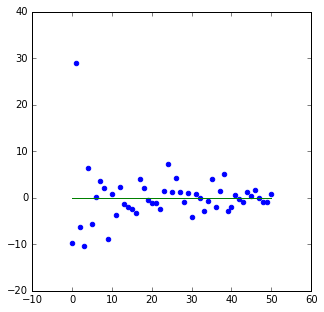

channel 2


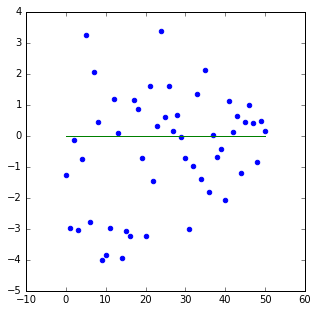

channel 3


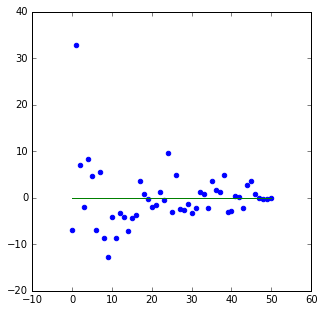

channel 4


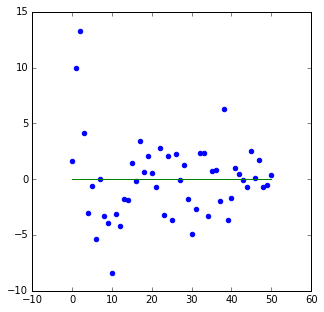

channel 5


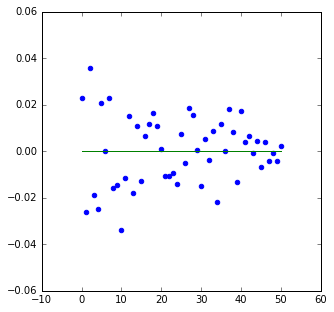

channel 6


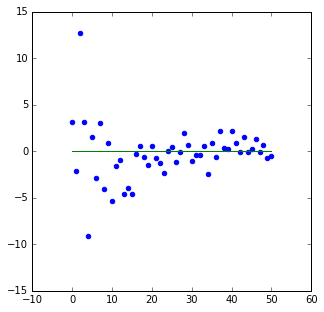

channel 7


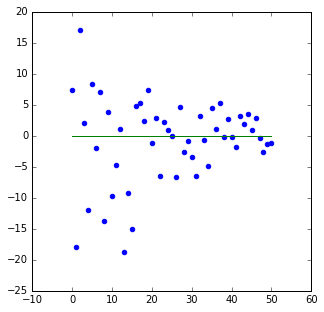

channel 8


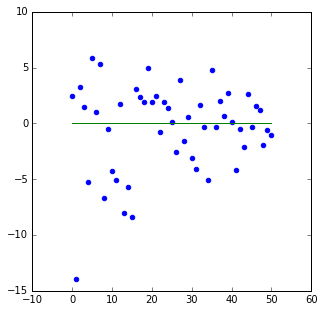

channel 9


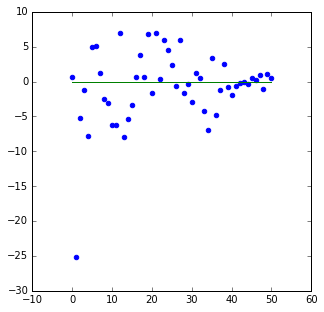

channel 10


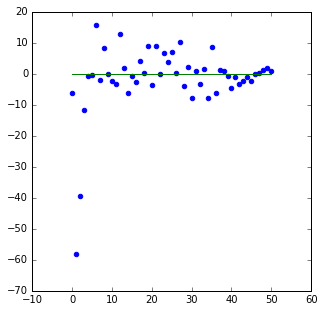

channel 11


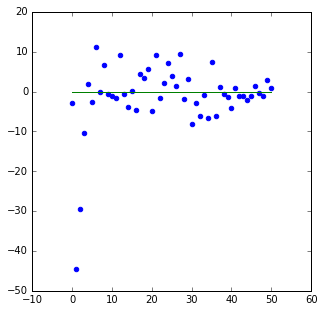

channel 12


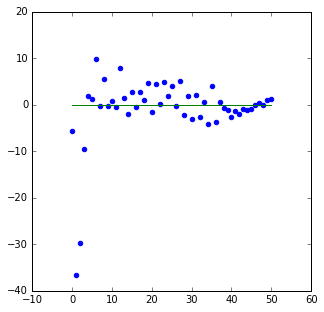

channel 13


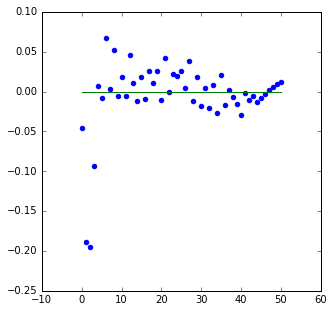

In [101]:
for i in range(14):
    print('channel', i)
    plt.scatter(np.arange(transformed_zero[:51, i].shape[0]), transformed_zero[:51, i] - transformed_one[:51, i],
                color='blue')
    plt.plot(np.zeros(transformed_zero[:51, i].shape[0]), color='green')
    plt.show()

In [102]:
file = open('./result.pkl', 'rb')
opt_params_dict = pkl.load(file)
file.close()

In [105]:
opt_params_dict['apent'][0]

{'channel': 0,
 'score': 0.58851998841251452,
 'subwindow': 10.0,
 'tol': 1.0000000000000001e-05}

In [106]:
opt_params_dict

{'apent': [{'channel': 0,
   'score': 0.58851998841251452,
   'subwindow': 10.0,
   'tol': 1.0000000000000001e-05},
  {'channel': 1,
   'score': 0.59138948435689453,
   'subwindow': 5.0,
   'tol': 0.0001},
  {'channel': 2,
   'score': 0.61315433082271142,
   'subwindow': 20.0,
   'tol': 0.001},
  {'channel': 3, 'score': 0.60713593568945545, 'subwindow': 10.0, 'tol': 0.01},
  {'channel': 4,
   'score': 0.59436315903823878,
   'subwindow': 25.0,
   'tol': 0.001},
  {'channel': 5,
   'score': 0.63579595162224789,
   'subwindow': 20.0,
   'tol': 0.0001},
  {'channel': 6, 'score': 0.67454540845886446, 'subwindow': 5.0, 'tol': 0.01},
  {'channel': 7, 'score': 0.58973750724217844, 'subwindow': 10.0, 'tol': 0.01},
  {'channel': 8, 'score': 0.68142714368482038, 'subwindow': 5.0, 'tol': 0.001},
  {'channel': 9, 'score': 0.54495332415990727, 'subwindow': 5.0, 'tol': 0.001},
  {'channel': 10,
   'score': 0.56172570249130938,
   'subwindow': 25.0,
   'tol': 0.001},
  {'channel': 11,
   'score': 0.6